In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from copy import deepcopy
import os


def magnitudeToDistance(m_g):
    return np.power(10, (m_g - 4.2)/5.0)/100.

def isInteresting(data):
    minsAndMaxes = 0
    back2 = data[0]
    back1 = data[1]
    for i in data[2:]:
        if (back1 < back2) and (i > back1):  #found Minimum
            minsAndMaxes += 1
        elif (back1 > back2) and (i < back1): #found Maximum
            minsAndMaxes += 1
        back2 = back1
        back1 = i
    return minsAndMaxes

def plotLB(data):
    if len(data) > 0:
        image = np.zeros((16,13))

        for i in data:
            image[15-int((i[1]+18.75)/2.5)] = np.log(np.array(i[2])/np.array(Volumes[0][0:13]))

        plt.figure(figsize=(20,5))

        plt.title("(%.2f, %.2f)" % (data[0][0], data[0][1]))

        plt.imshow(image, extent=(16,22.5,-20,20), aspect=float(1/16), cmap='binary', vmin=0)
        plt.colorbar()
        
    

Volumes = [[0.0130705, 0.0230351, 0.0459612, 0.0917046, 0.182975, 0.365082, 
            0.728435, 1.45342, 2.89995, 5.78617, 11.5449, 23.0351, 45.9612, 
            91.7046], [0.0129317, 0.0227905, 0.045473, 0.0907305, 0.181031, 
            0.361205, 0.720698, 1.43798, 2.86915, 5.72471, 11.4223, 22.7905, 
            45.473, 90.7305], [0.0127682, 0.0225024, 0.0448982, 0.0895837, 
            0.178743, 0.356639, 0.711589, 1.41981, 2.83288, 5.65235, 11.2779, 
            22.5024, 44.8982, 89.5837], [0.0125805, 0.0221715, 0.044238, 
            0.0882664, 0.176115, 0.351395, 0.701125, 1.39893, 2.79123, 5.56923, 
            11.1121, 22.1715, 44.238, 88.2664], [0.0123688, 0.0217984, 
            0.0434935, 0.086781, 0.173151, 0.345481, 0.689326, 1.37539, 2.74426, 
            5.47551, 10.9251, 21.7984, 43.4935, 86.781], [0.0121335, 0.0213838, 
            0.0426663, 0.0851305, 0.169858, 0.338911, 0.676216, 1.34923, 
            2.69206, 5.37137, 10.7173, 21.3838, 42.6663, 85.1305], [0.0118752, 
            0.0209285, 0.0417579, 0.0833179, 0.166241, 0.331695, 0.661818, 
            1.3205, 2.63474, 5.257, 10.4891, 20.9285, 41.7579, 
            83.3179], [0.0115942, 0.0204334, 0.0407699, 0.0813467, 0.162308, 
            0.323847, 0.64616, 1.28926, 2.57241, 5.13263, 10.2409, 20.4334, 
            40.7699, 81.3467]]

Density = []

filepath = "/home/weissj3/Desktop/SummerREUDiskWork/public_html/RaeHelmreich2018/Density_to_StarCounts_Updated/JakeWork/PannStars_Results/"

files = os.listdir(filepath)
coords = []
results = []
top = 0;
bottom = 100;
average = 0;
nans = 0
interestingPlots = 0


for filename in files: 
    temp = filename.split('.')[0].split('-')
    filename = filepath + filename
    l = float(temp[1])/100.
    if(temp[3] == ''):
        b = -float(temp[4])/100.
    else:
        b = float(temp[3])/100.
    coords.append([l, b])
    f = open(filename, 'r')
    f.readline()
    inputData = (f.readline().split(','))
    results.append((l, b, list(map(float,inputData[1:14])), float(inputData[14])))
    if not np.isnan(float(inputData[14])):
        if float(inputData[14]) > top:
            top = float(inputData[14])
        if float(inputData[14]) < bottom:
            bottom = float(inputData[14])
        average += float(inputData[14])
        interesting = isInteresting(results[len(results)-1][2])
        if interesting > 2:
            interestingPlots += 1
    else:
        nans += 1.0
        
average = average / (float(len(results)) - nans)
    

datatypes = [('l', float), ('b', float), ('values', list), ('X', float)]

results = np.array(results, dtype=datatypes)

results = np.sort(results, order=['l', 'b'])
#print(results)
print("Statistics:")
print("Min: " + str(bottom) + ", Max: " + str(top) + ", Average: " + str(average))
print("Interesting: " + str(interestingPlots))

#for i in np.arange(1.25, 358.75, 2.5):
#    L = i
#    plotThis = results[np.where(results['l'] == L)]
#    plotLB(plotThis)

#plt.show()

Statistics:
Min: 20.5412, Max: 20692.9, Average: 1254.7618048064073
Interesting: 441


In [2]:
def getVolumes(bmin = 10.0, bmax = 12.5):
    deltaTheta = 0.044
    deltaPhi = np.cos((90 - bmax)* np.pi /180.) - np.cos((90-bmin) * np.pi /180.)
    volumes = []
    for i in np.arange(16, 22.5, 0.5):
        deltaR = magnitudeToDistance(float(i+0.5))-magnitudeToDistance(float(i))
        volumes.append(deltaR*deltaR*deltaR * deltaTheta * deltaPhi /3.)
    return volumes

print(getVolumes(12.25,15))
print(magnitudeToDistance(16.5) - magnitudeToDistance(16))



[0.00014276665183414467, 0.00028485692023895546, 0.0005683642781108828, 0.00113403582528914, 0.0022626989460240473, 0.004514677937121524, 0.009007966752160134, 0.017973256595077727, 0.035861361561424554, 0.07155282328698394, 0.1427666518341447, 0.28485692023895437, 0.5683642781108837]
0.593163850358831


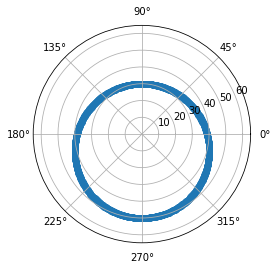

In [3]:
#Create a circle around the GC with radius R and convert to heliocentric coordinates
def makeCircle(x_in=7.5,y_in=0.0, r_in= 45.7):
    x = np.array([(r_in * np.cos(i) + x_in) for i in np.arange(0,2*np.pi, 0.01)])
    y = np.array([(r_in * np.sin(i) + y_in) for i in np.arange(0,2*np.pi, 0.01)])
    
    theta = np.arctan2(y,x)
    r_out = np.sqrt(x * x + y * y)
    return theta, r_out

t_, r_ = makeCircle(0,-10,40)

plt.subplot(111, polar=True)

plt.scatter(t_,r_)
plt.show()
        
    

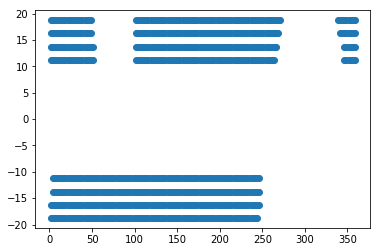

In [4]:
temp = np.array(coords).transpose()

plt.plot(temp[0], temp[1], 'o')
plt.show()


In [5]:
print(results[0])

(1.25, -18.75, list([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]), nan)


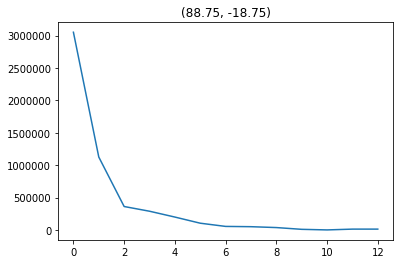

In [6]:
index = 220
plt.plot(range(0,13), np.array(results['values'][index])/np.array(getVolumes()))
plt.title("(%.2f, %.2f)" % (results[index][0], results[index][1]))

plt.show()

[89.6994, 56.2326, 22.7659, 89.7913, 156.817, 162.141, 167.466, 602.319, 1037.17, 518.836, 0.5, 14050.7, 28100.9]


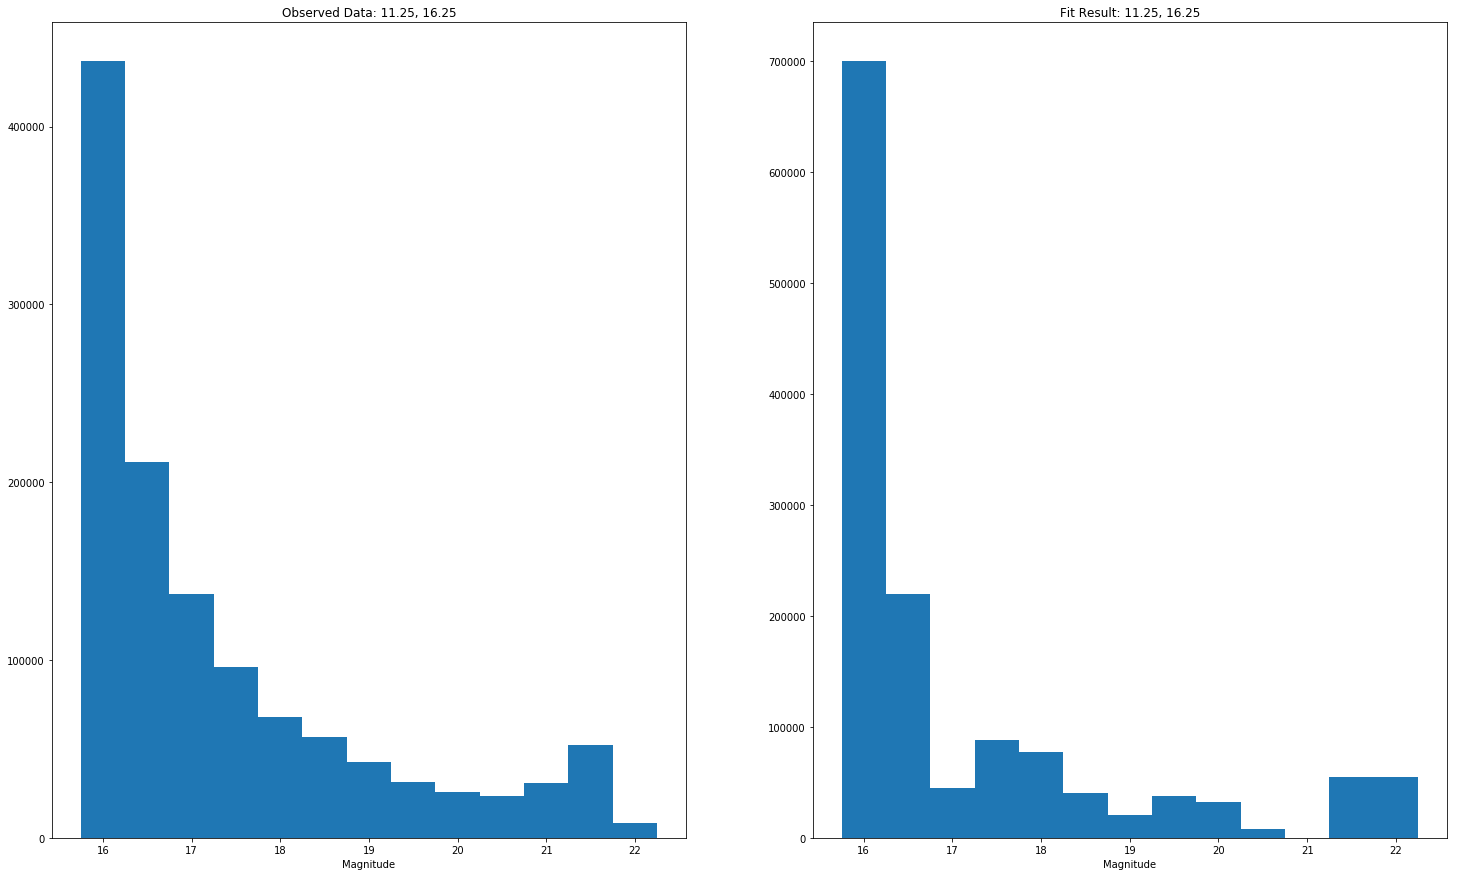

In [7]:
#Talk Plot Comparing model fit to real data
plt.figure(figsize=(25,15))
temp = np.array([56, 54, 70, 98, 138, 229, 345, 509, 831, 1508, 3916, 13399, 4236])/getVolumes(15,17.5)
plt.subplot(121)
plt.bar(np.arange(16, 22.5, 0.5), temp, width = 0.5)
plt.xlabel("Magnitude")
plt.title("Observed Data: 11.25, 16.25")
#Plot distance histogram
for i in results:
    if i['l'] == 11.25 and i['b'] == 16.25:
        temp = i['values']
        break;

        
print(temp)
plt.subplot(122)
plt.bar(np.arange(16, 22.5, 0.5), np.array(temp)/getVolumes(15,17.5), width = 0.5)
plt.title("Fit Result: 11.25, 16.25")
plt.xlabel("Magnitude")
plt.show()


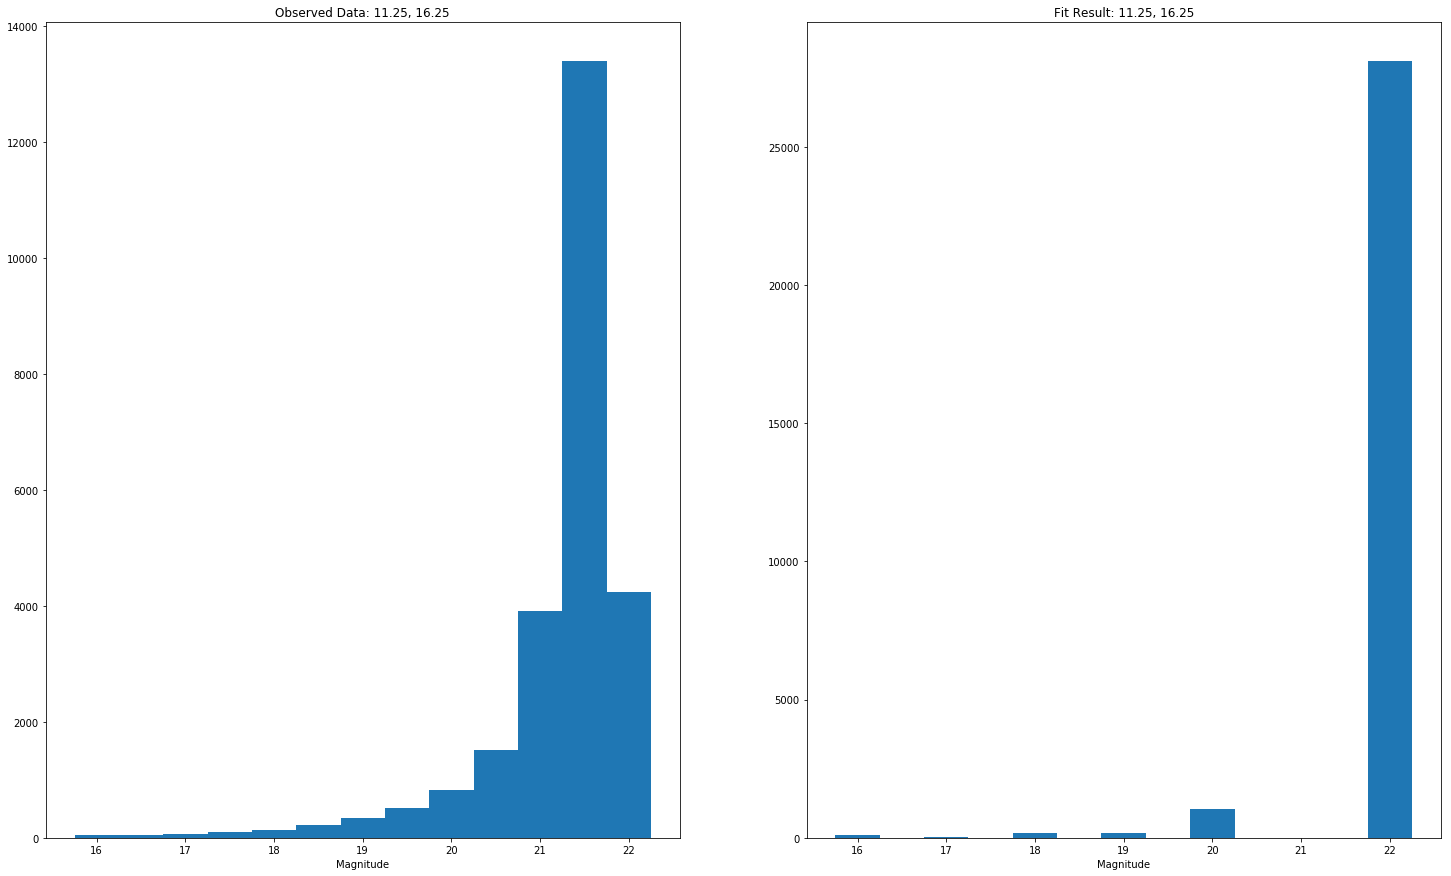

In [8]:
#Talk Plot Comparing model fit to real data
plt.figure(figsize=(25,15))
temp = np.array([56, 54, 70, 98, 138, 229, 345, 509, 831, 1508, 3916, 13399, 4236])
plt.subplot(121)
plt.bar(np.arange(16, 22.5, 0.5), temp, width = 0.5)
plt.xlabel("Magnitude")
plt.title("Observed Data: 11.25, 16.25")
#Plot distance histogram
for i in results:
    if i['l'] == 11.25 and i['b'] == 16.25:
        temp = deepcopy(i['values'])
        break;

plt.subplot(122)
for i in range(len(temp)):
    if i % 2:
        temp[i] = 0
plt.bar(np.arange(16, 22.5, 0.5), np.array(temp), width = 0.5)
plt.title("Fit Result: 11.25, 16.25")
plt.xlabel("Magnitude")
plt.show()


In [9]:
import bisect
def lrToXY(l,r):
    return r * np.cos(l * 3.14/180.), r * np.sin(l * 3.14/180. + 3.14)

def averageL(inputData):
    #Assumes inputData is Sorted on L
    pastL = inputData['l'][0]
    for i in inputData['l']:
        workingL = i
        
def find_elem_in_sorted_list(elem, sorted_list):
    # https://docs.python.org/3/library/bisect.html
    'Locate the leftmost value exactly equal to x'
    i = bisect.bisect_left(sorted_list, elem)
    if i != len(sorted_list) and sorted_list[i] == elem:
        return i
    return -1

def subtractData(inputData1, inputData2):
    inputData1Sorted = np.sort(inputData1, order=['l'])

    output =  []
    for i in range(len(inputData2['values'])):
        element = find_elem_in_sorted_list( inputData2['l'][i], inputData1Sorted['l'] )
        if element != -1:
            temp = []
            for j in range(len(inputData1Sorted['values'][element])):
                temp.append(inputData1Sorted['values'][element][j] - inputData2['values'][i][j])
            output.append((inputData2['l'][i], temp))
            
    output = np.array(output, dtype=[('l', float), ('values', list)])
            
    return output


testData1 = np.array([(12.5, [2,2,2,3,3,3]), (11.5, [1,1,1,1,1,1]), (13.5, [3,3,3,3,3,3])  ], dtype=[('l', float), ('values', list)])
testData2 = np.array([(12.5, [2,2,2,3,2,1]), (11.5, [1,1,1,1,1,1]), (14.5, [3,3,3,3,3,3])  ], dtype=[('l', float), ('values', list)])
testData3 = np.array([(12.5, [2,2,2,3,2,1]), (11.5, [1,12,1,1,1,0]) ], dtype=[('l', float), ('values', list)])

print(testData1)
print(subtractData(testData1, testData1))

print(testData2)
print(subtractData(testData1, testData2))

print(testData3)
print(subtractData(testData1, testData3))


[(12.5, list([2, 2, 2, 3, 3, 3])) (11.5, list([1, 1, 1, 1, 1, 1]))
 (13.5, list([3, 3, 3, 3, 3, 3]))]
[(12.5, list([0, 0, 0, 0, 0, 0])) (11.5, list([0, 0, 0, 0, 0, 0]))
 (13.5, list([0, 0, 0, 0, 0, 0]))]
[(12.5, list([2, 2, 2, 3, 2, 1])) (11.5, list([1, 1, 1, 1, 1, 1]))
 (14.5, list([3, 3, 3, 3, 3, 3]))]
[(12.5, list([0, 0, 0, 0, 1, 2])) (11.5, list([0, 0, 0, 0, 0, 0]))]
[(12.5, list([2, 2, 2, 3, 2, 1])) (11.5, list([1, 12, 1, 1, 1, 0]))]
[(12.5, list([0, 0, 0, 0, 1, 2])) (11.5, list([0, -11, 0, 0, 0, 1]))]


In [10]:
def pltDataMag(plotType = 0): #north = 1, sub = 0, south = -1
    count = 0

    for b in np.arange(11.25, 21.25, 2.5):
        dataNorth = deepcopy(results[np.where(results['b'] == b)])
        dataSouth = deepcopy(results[np.where(results['b'] == -b)])
        
        bName = b
        if(plotType == -1):
            dataSub = dataSouth
            bName = -b
            cmapname = 'binary'
        elif(plotType == 1):
            dataSub = dataNorth
            cmapname = 'binary'
        else:
            dataSub = subtractData(dataNorth, dataSouth)
            cmapname = 'seismic'





        fig = plt.figure(count, figsize=(20,20))
        count += 1

        for i in range(len(dataSub['values'])):
            dataSub['values'][i] = dataSub['values'][i]/np.array(getVolumes(b-1.25, b+1.25))

        X = []
        Y = []
        Y2 = []
        C = []
        maxVal = 0


        for i in range(len(dataSub['l'])):
            for j in range(len(dataSub['values'][i])):
                x,y = dataSub['l'][i]*3.14/180., float(j+1)/2.0+16.0
                if np.isnan(dataSub['values'][i][j]): continue
                if magnitudeToDistance(float(j+1)/2.0+16.0) >= 10 and dataSub['values'][i][j] > maxVal:
                    maxVal = dataSub['values'][i][j]
                X.append(x)
                Y.append(y)
                Y2.append(y*y*0.3)
                if(dataSub['values'][i][j] >= 0):                    
                    C.append(np.sqrt(dataSub['values'][i][j]))
                else:
                    C.append(-np.sqrt(abs(dataSub['values'][i][j])))
        
        maxVal = np.sqrt(1300000 * 2) * 2 
        if (plotType == 0):
            vmin = maxVal
        else:
            vmin = 0
        plt.subplot(111, polar=True)
        sc = plt.scatter(X,Y,c=C, s=Y2, cmap=cmapname, vmin = -vmin/2, vmax = maxVal/2)
        plt.plot(0,18.57, 'x', ms=15, color='g')
        plt.ylim([5, 25])
        plt.title("B of %.2f" % (bName))
        plt.colorbar(sc)
    plt.show()

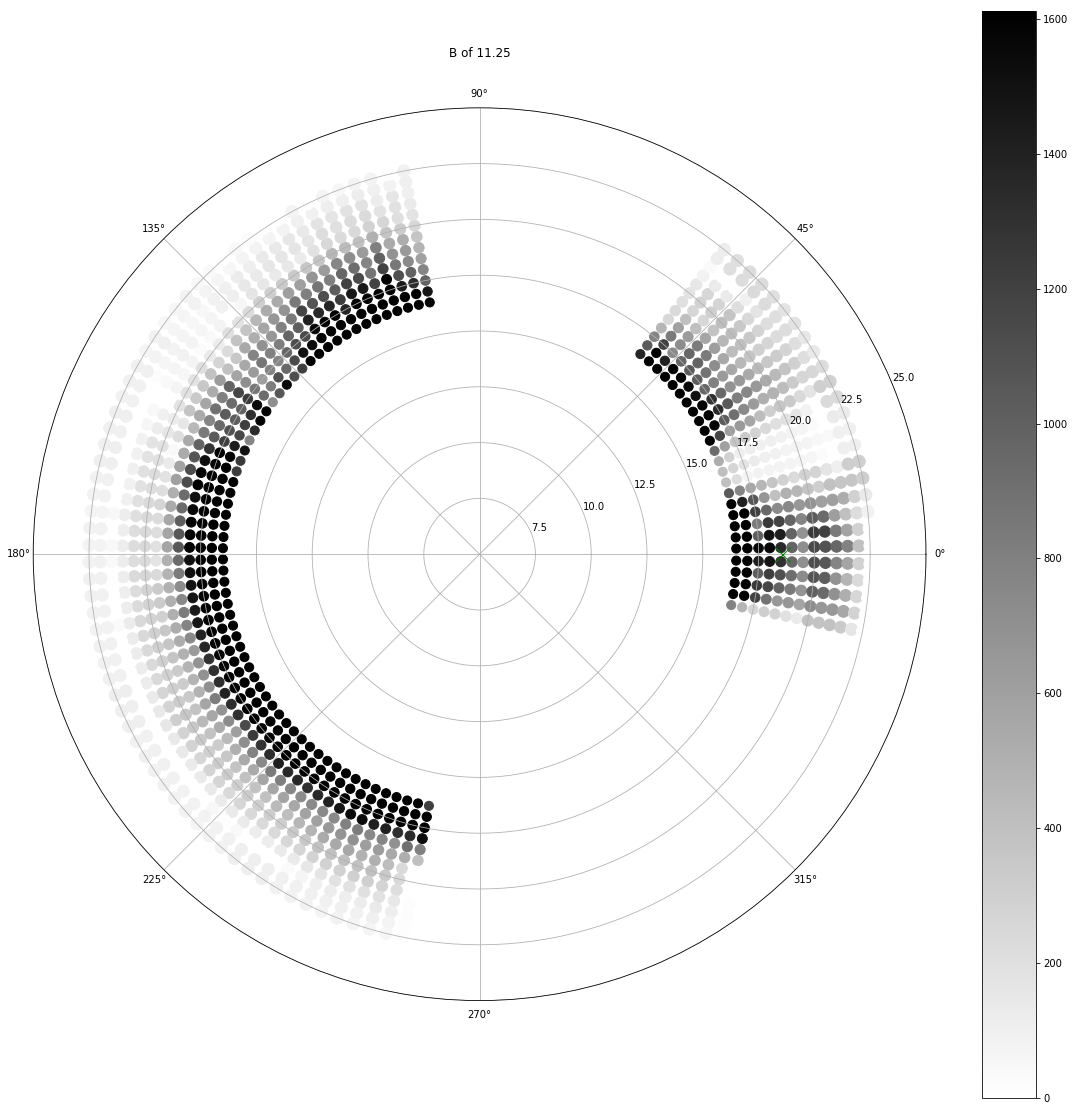

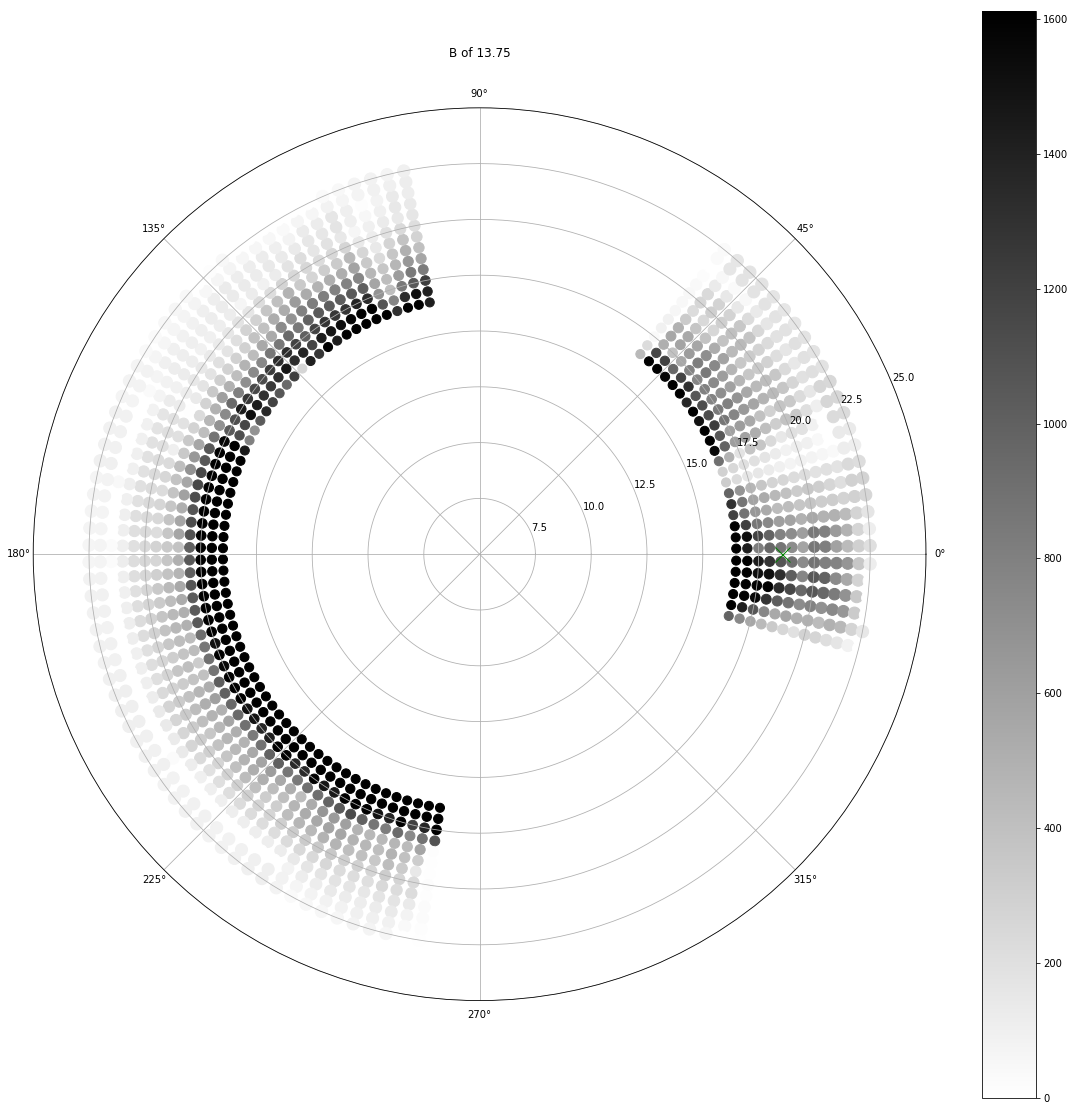

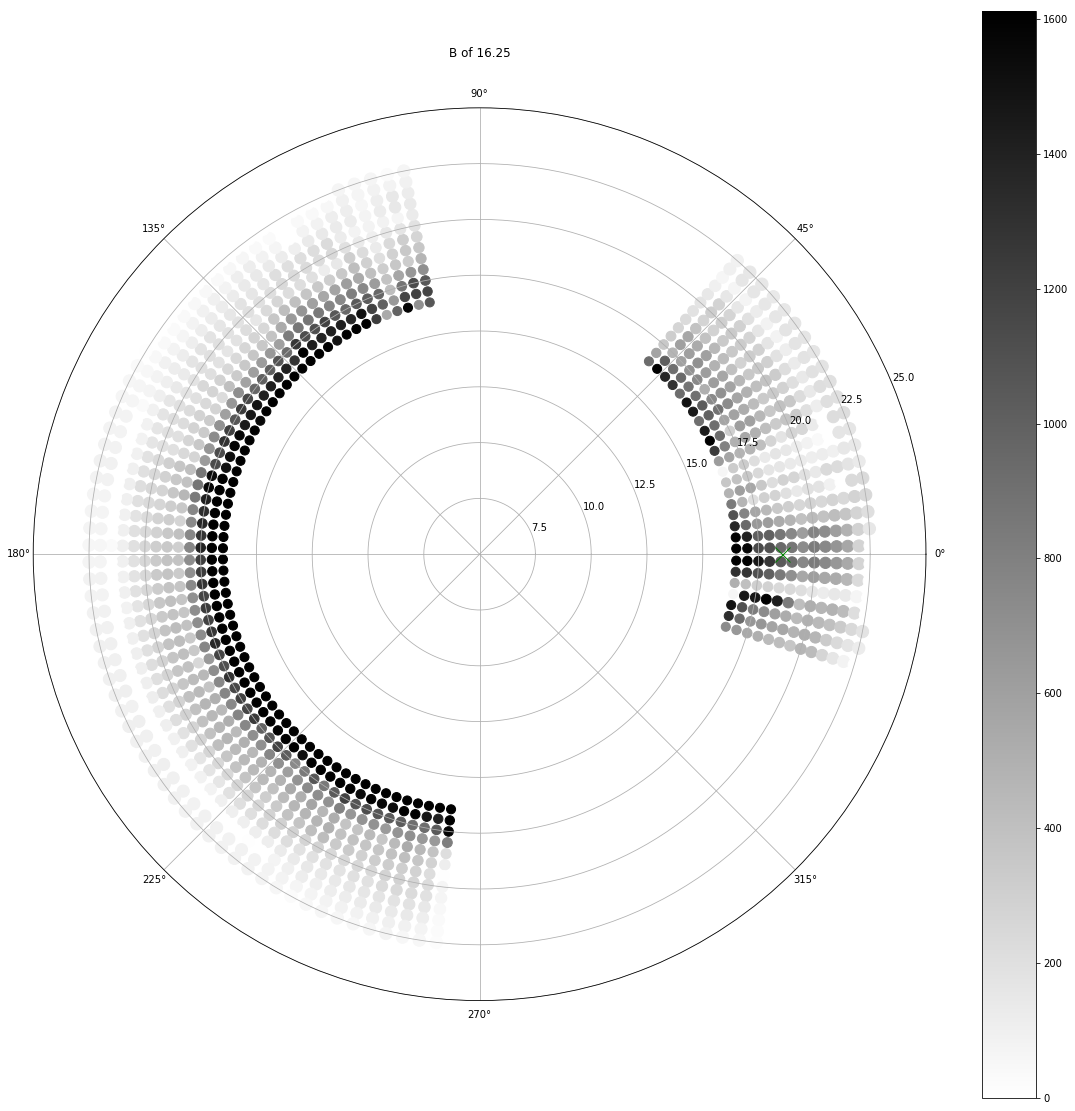

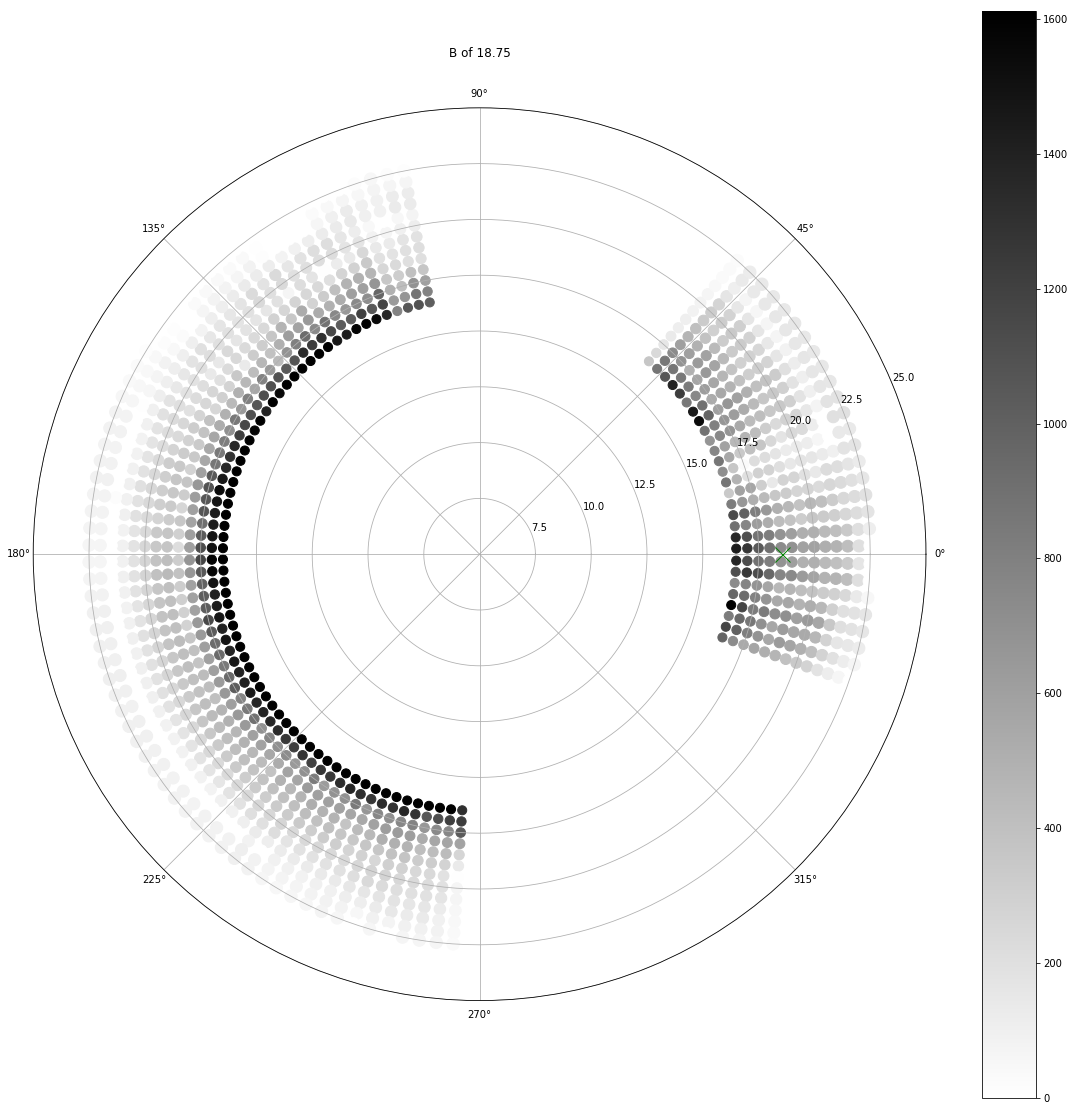

In [11]:
pltDataMag(1) #NORTH!

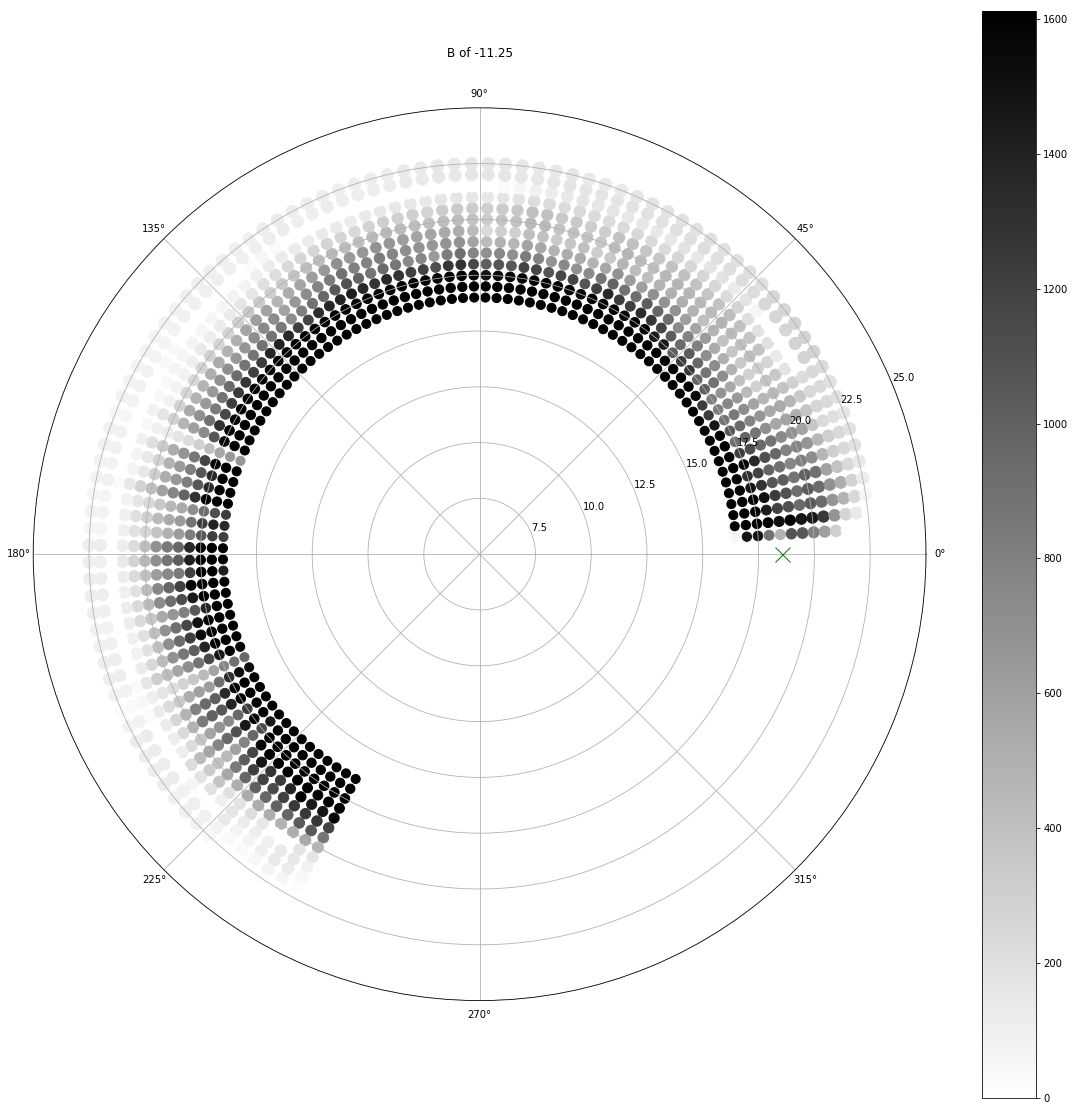

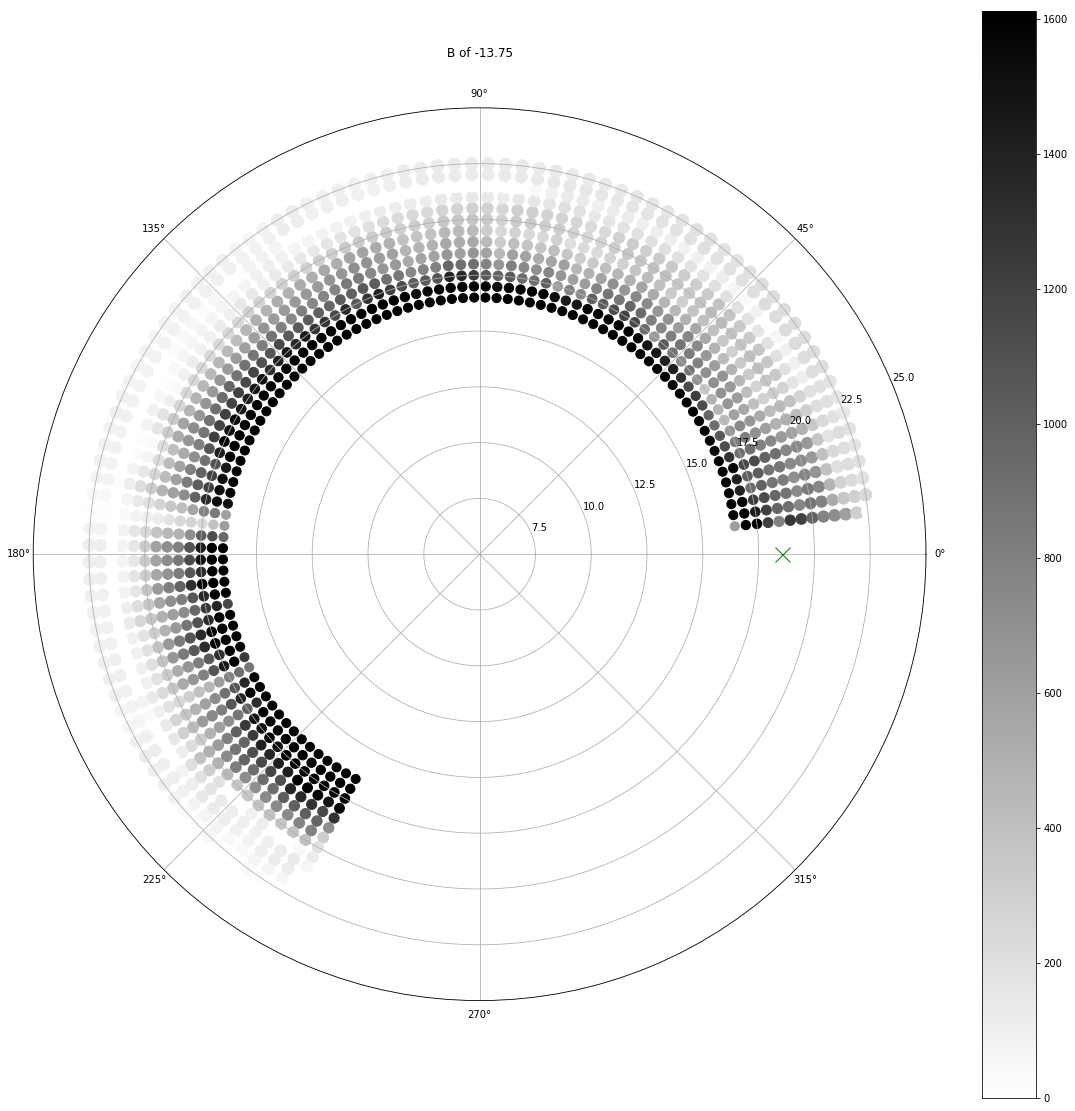

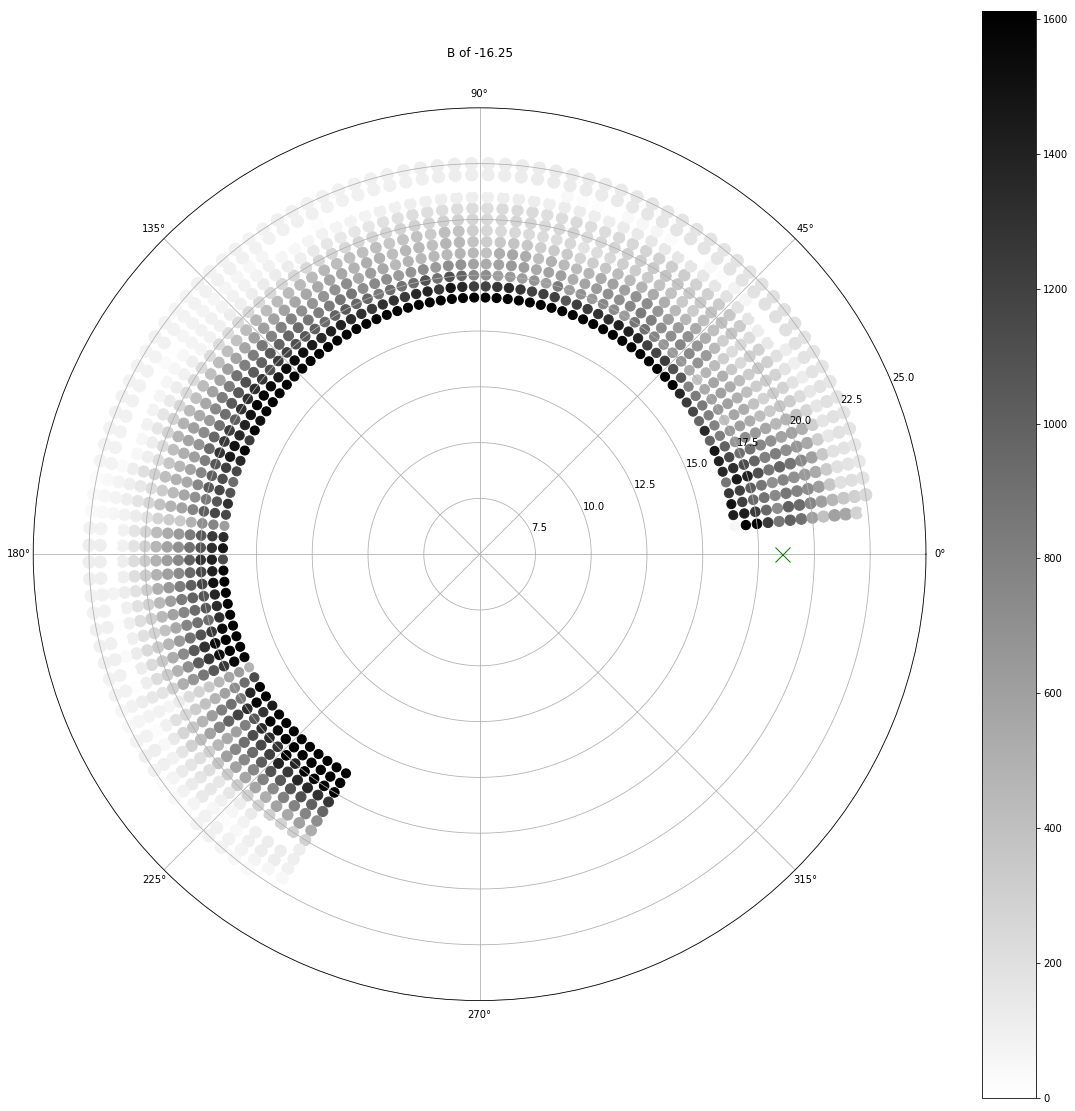

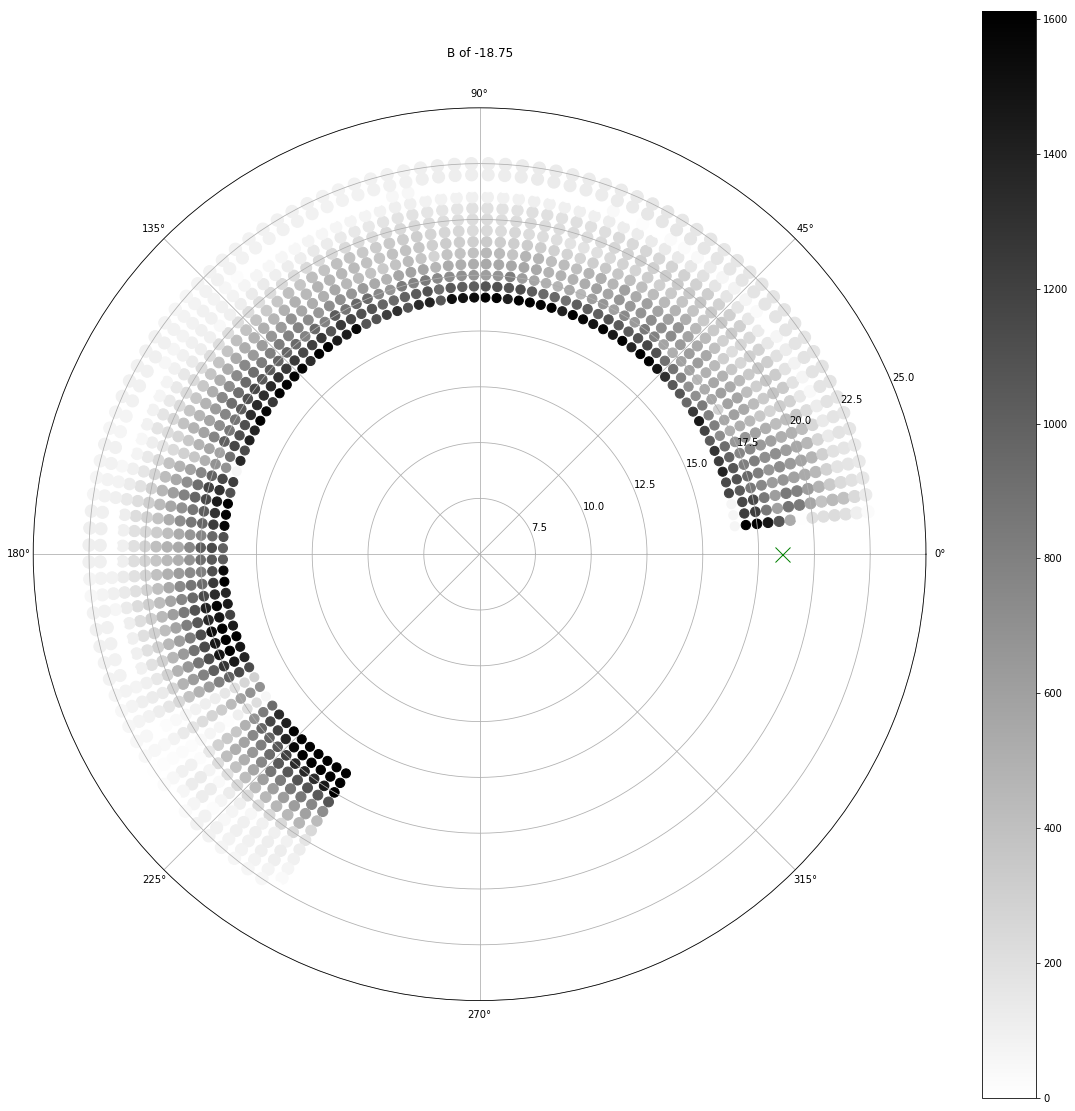

In [12]:
pltDataMag(-1) #SOUTH!

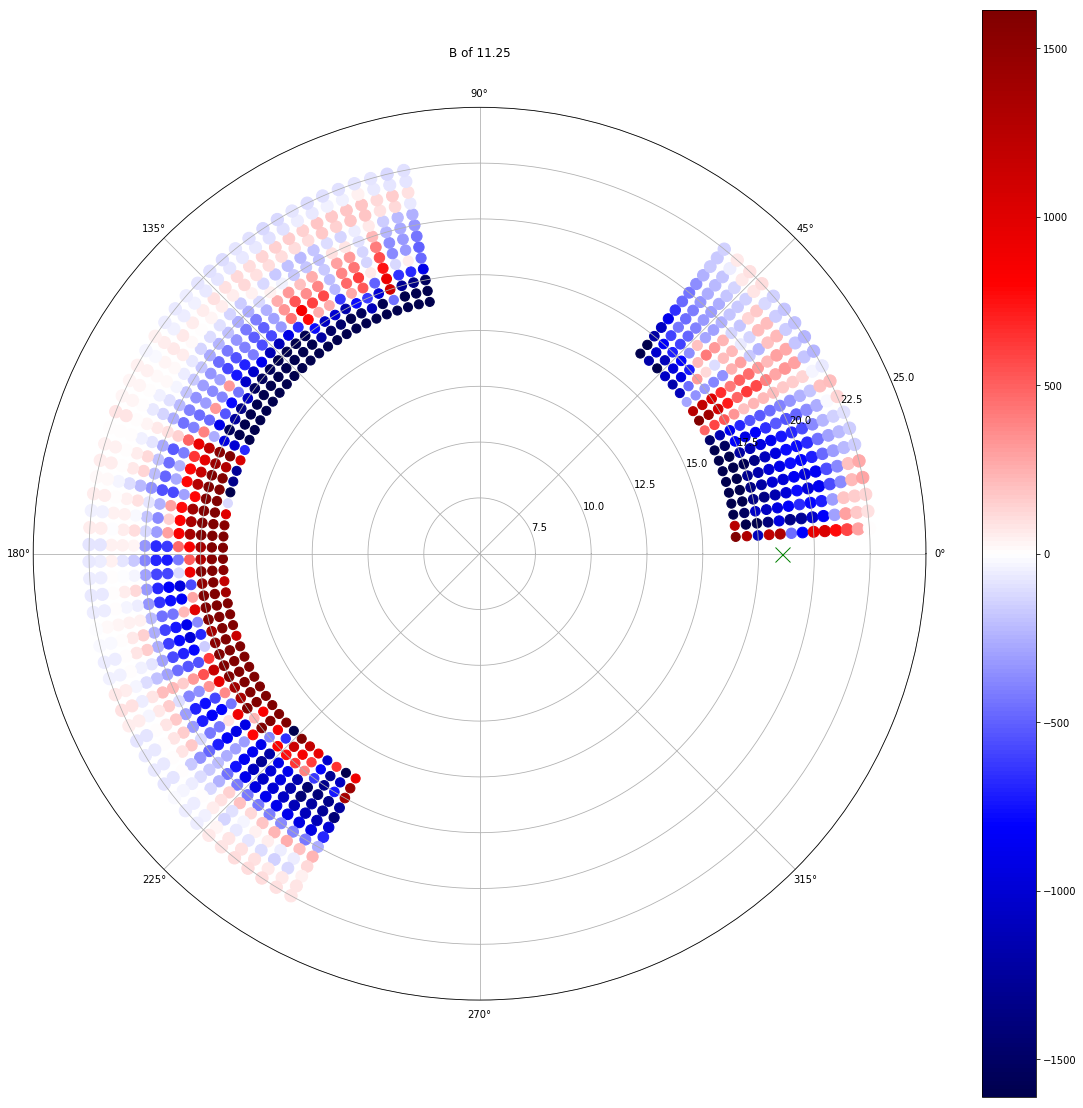

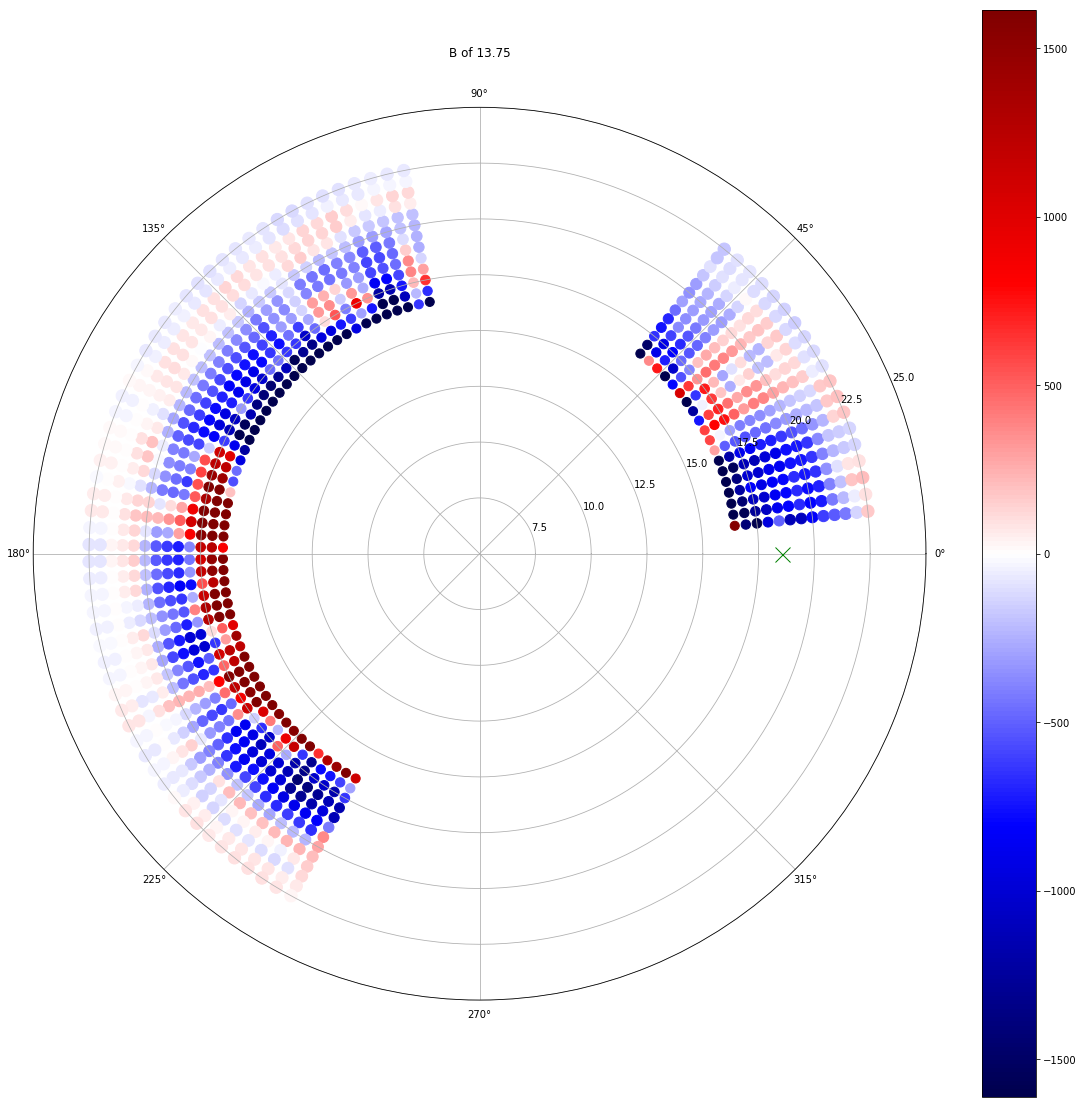

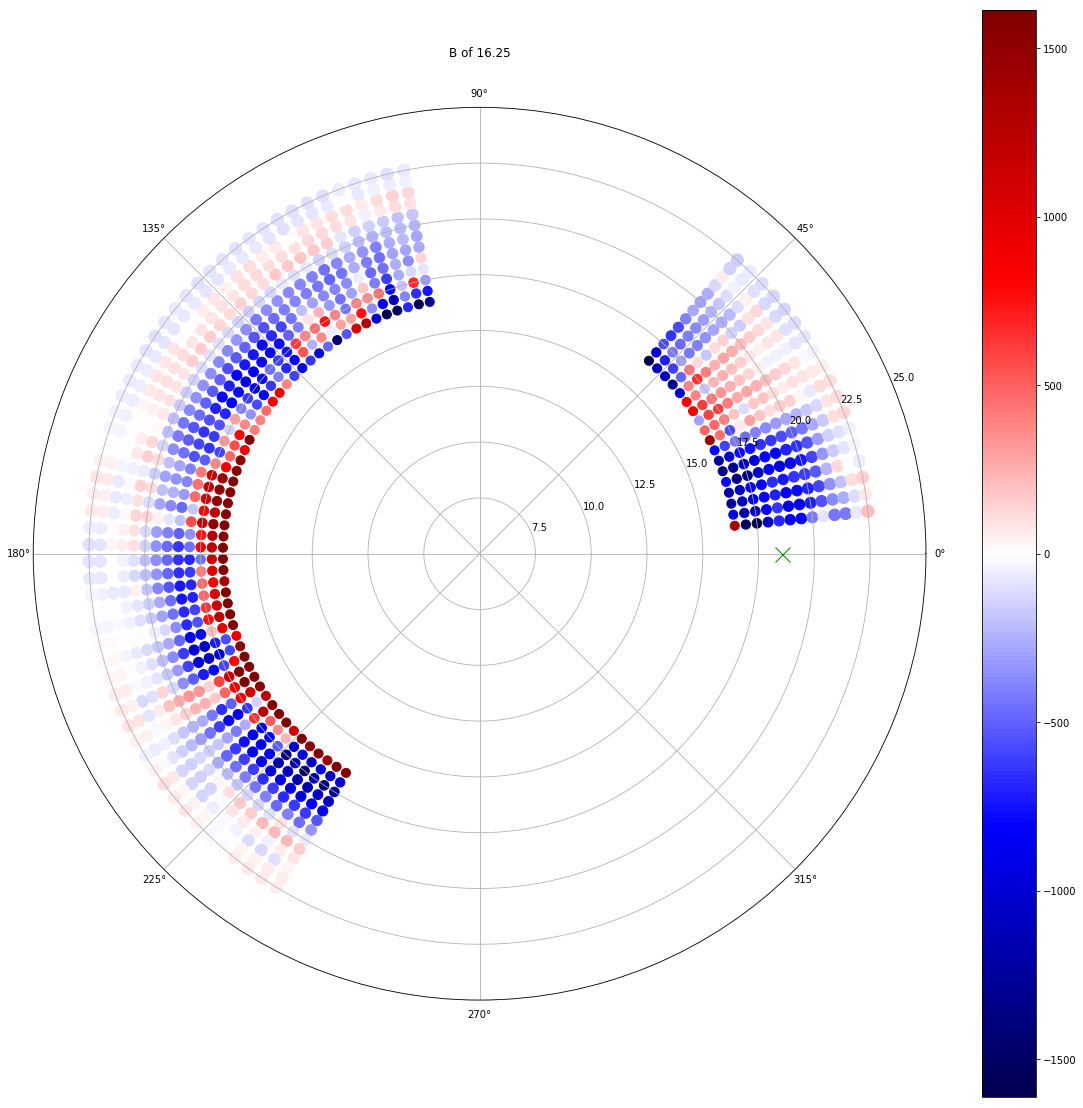

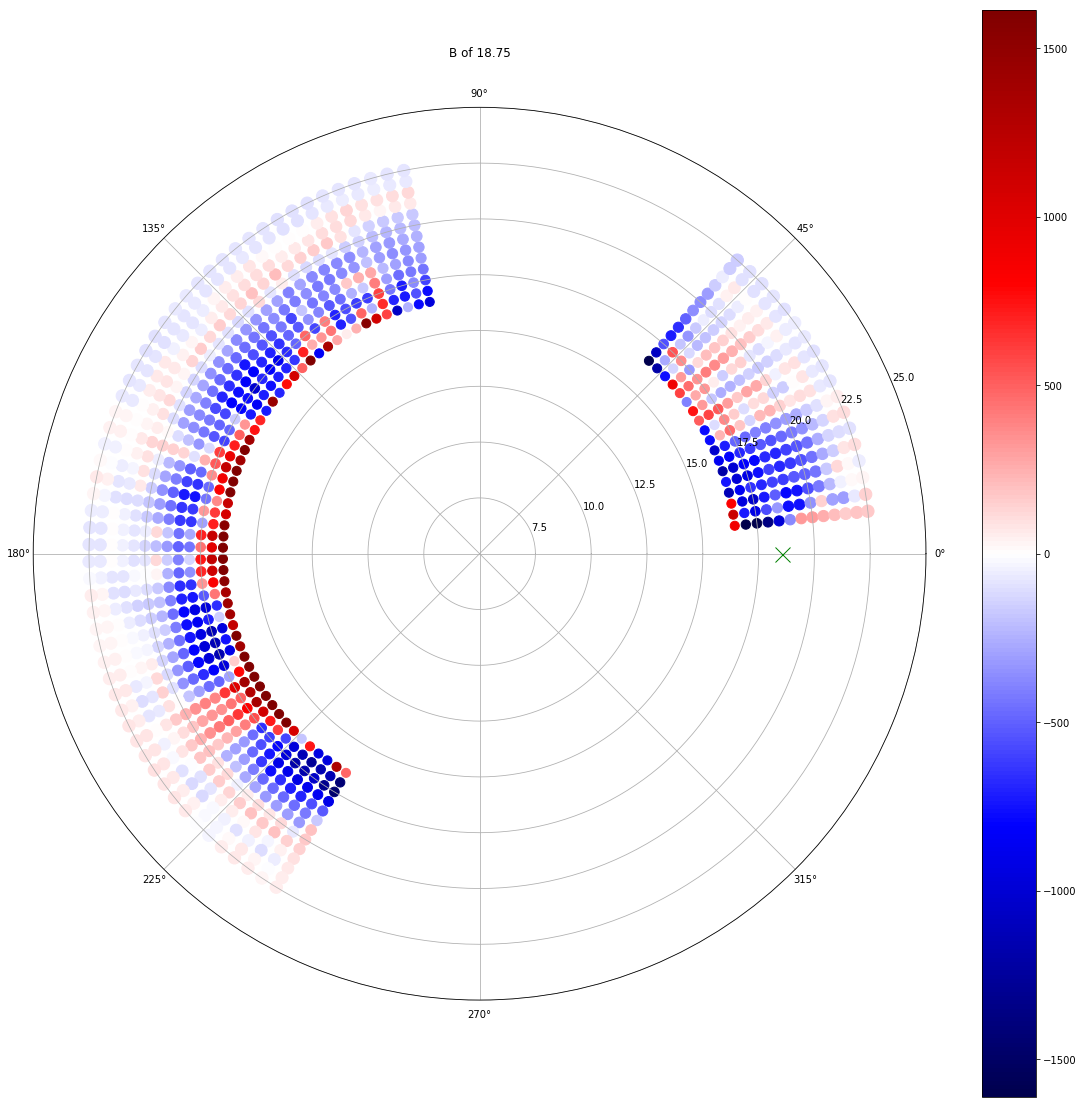

In [13]:
pltDataMag(0) #DIFFERENCE!

In [14]:
def pltDataDist(plotType = 0): #north = 1, sub = 0, south = -1
    count = 0

    for b in np.arange(11.25, 21.25, 2.5):
        dataNorth = deepcopy(results[np.where(results['b'] == b)])
        dataSouth = deepcopy(results[np.where(results['b'] == -b)])
        
        bName = b
        if(plotType == -1):
            dataSub = dataSouth
            bName = -b
            cmapname = 'binary'
        elif(plotType == 1):
            dataSub = dataNorth
            cmapname = 'binary'
        else:
            dataSub = subtractData(dataNorth, dataSouth)
            cmapname = 'seismic'





        fig = plt.figure(count, figsize=(20,20))
        count += 1

        for i in range(len(dataSub['values'])):
            dataSub['values'][i] = dataSub['values'][i]/np.array(getVolumes(b-1.25, b+1.25))

        X = []
        Y = []
        Y2 = []
        C = []
        maxVal = 0


        for i in range(len(dataSub['l'])):
            for j in range(len(dataSub['values'][i])):
                x,y = dataSub['l'][i]*3.14/180., magnitudeToDistance(float(j+1)/2.0+16.0)
                if np.isnan(dataSub['values'][i][j]): continue
                if magnitudeToDistance(float(j+1)/2.0+16.0) >= 10 and dataSub['values'][i][j] > maxVal:
                    maxVal = dataSub['values'][i][j]
                X.append(x)
                Y.append(y)
                Y2.append(y*y*0.15)
                
                if(dataSub['values'][i][j] >= 0):                    
                    C.append(np.sqrt(dataSub['values'][i][j]))
                else:
                    C.append(-np.sqrt(abs(dataSub['values'][i][j])))
        
        maxVal = np.sqrt(1300000 *2)*2
        if (plotType == 0):
            vmin = maxVal
        else:
            vmin = 0
        plt.subplot(111, polar=True)
        sc = plt.scatter(X,Y,c=C, s=Y2, cmap=cmapname, vmin = -vmin/2, vmax = maxVal/2)
        plt.plot(0,7.5, 'x', ms=15, color='g')
        t_, r_ = makeCircle(7.5, 0, 7.5)
        plt.plot(t_, r_)
        t_, r_ = makeCircle(7.5, 0, 10)
        plt.plot(t_, r_)
        t_, r_ = makeCircle(7.5, 0, 15)
        plt.plot(t_, r_)
        t_, r_ = makeCircle(7.5, 0, 20)
        plt.plot(t_, r_)
        t_, r_ = makeCircle(7.5, 0, 30)
        plt.plot(t_, r_)
        t_, r_ = makeCircle(7.5, 0, 40)
        plt.plot(t_, r_)
        plt.ylim([0, 50])
        plt.title("B of %.2f" % (bName))
        plt.colorbar(sc)




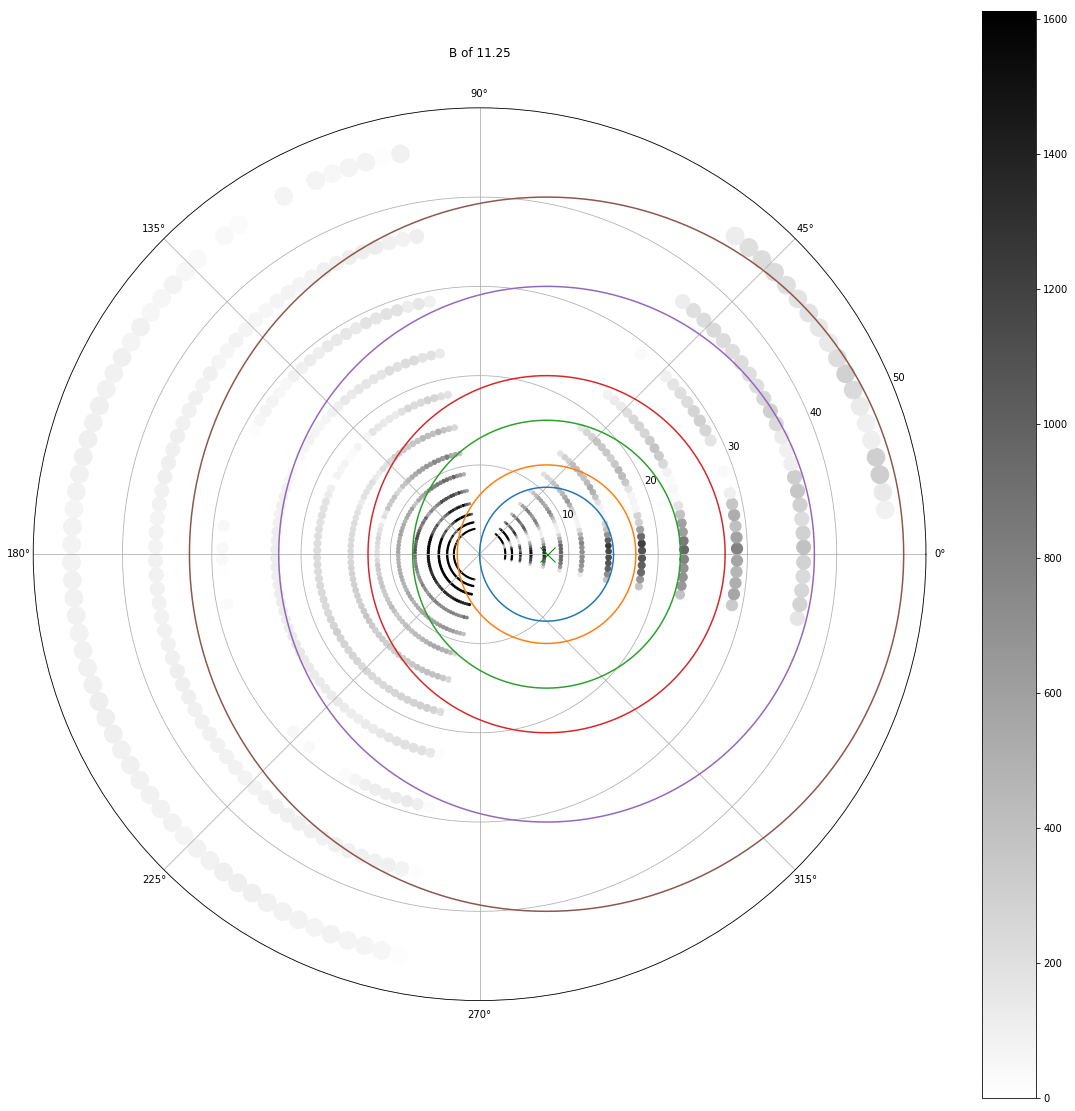

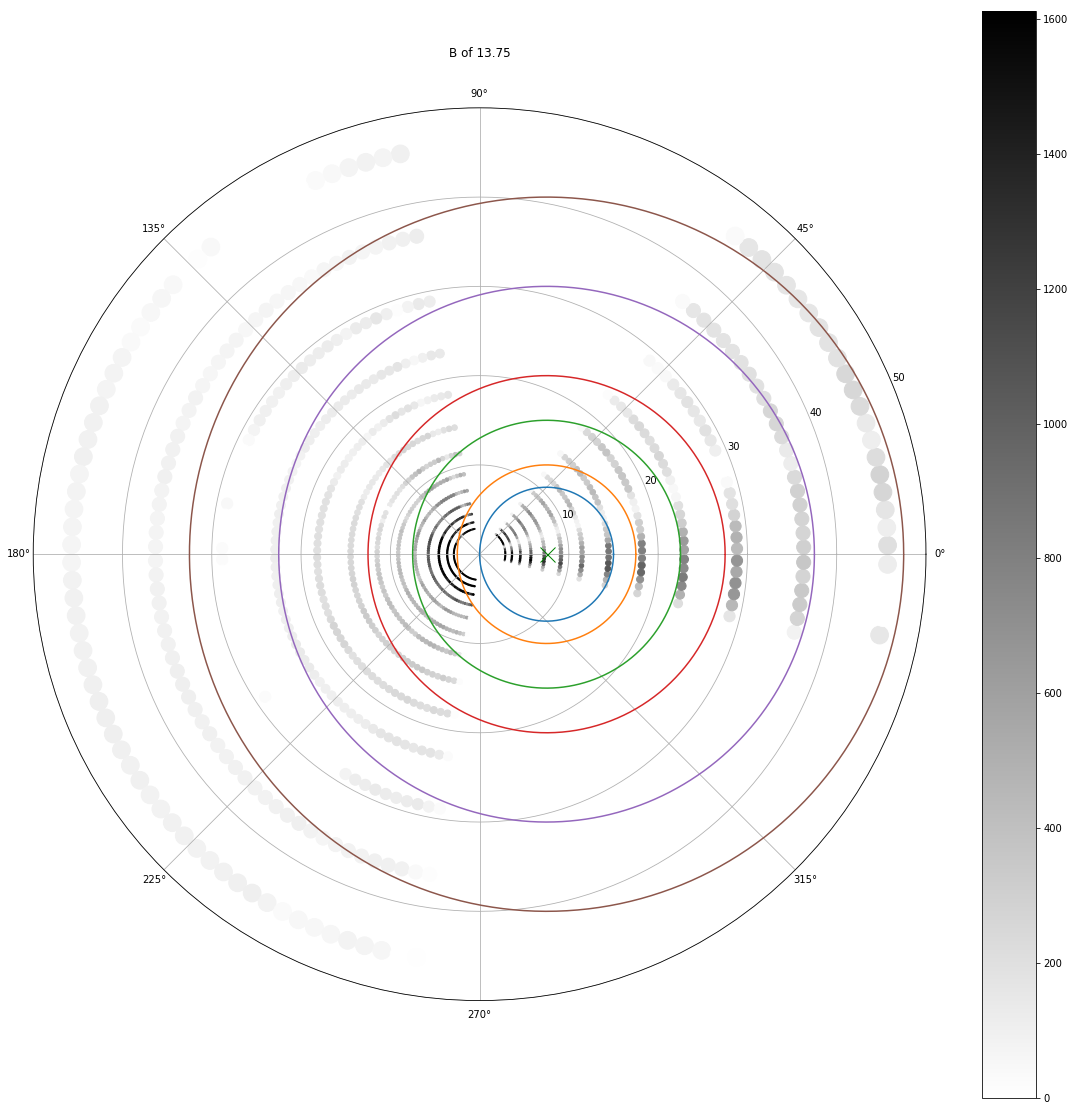

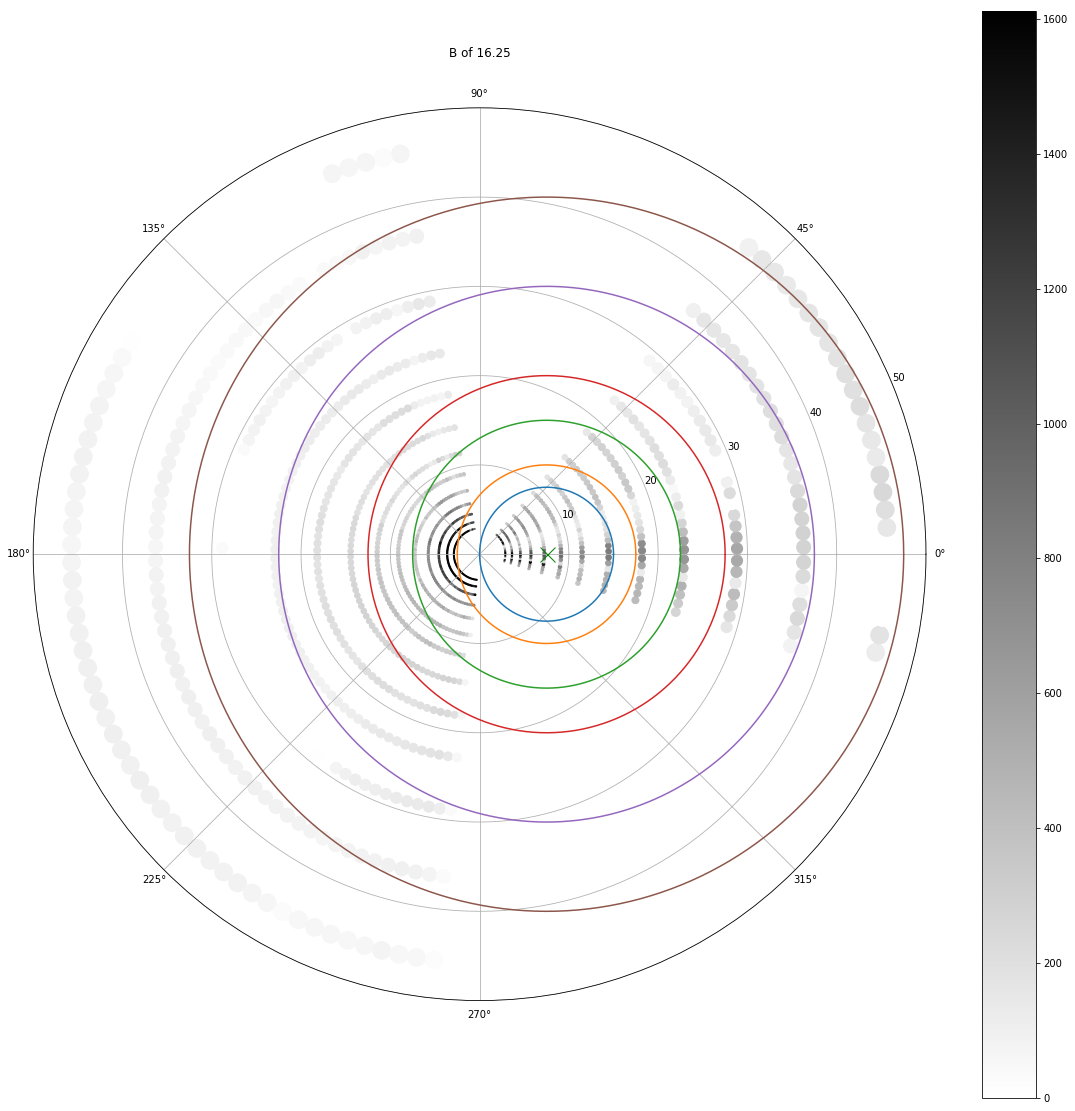

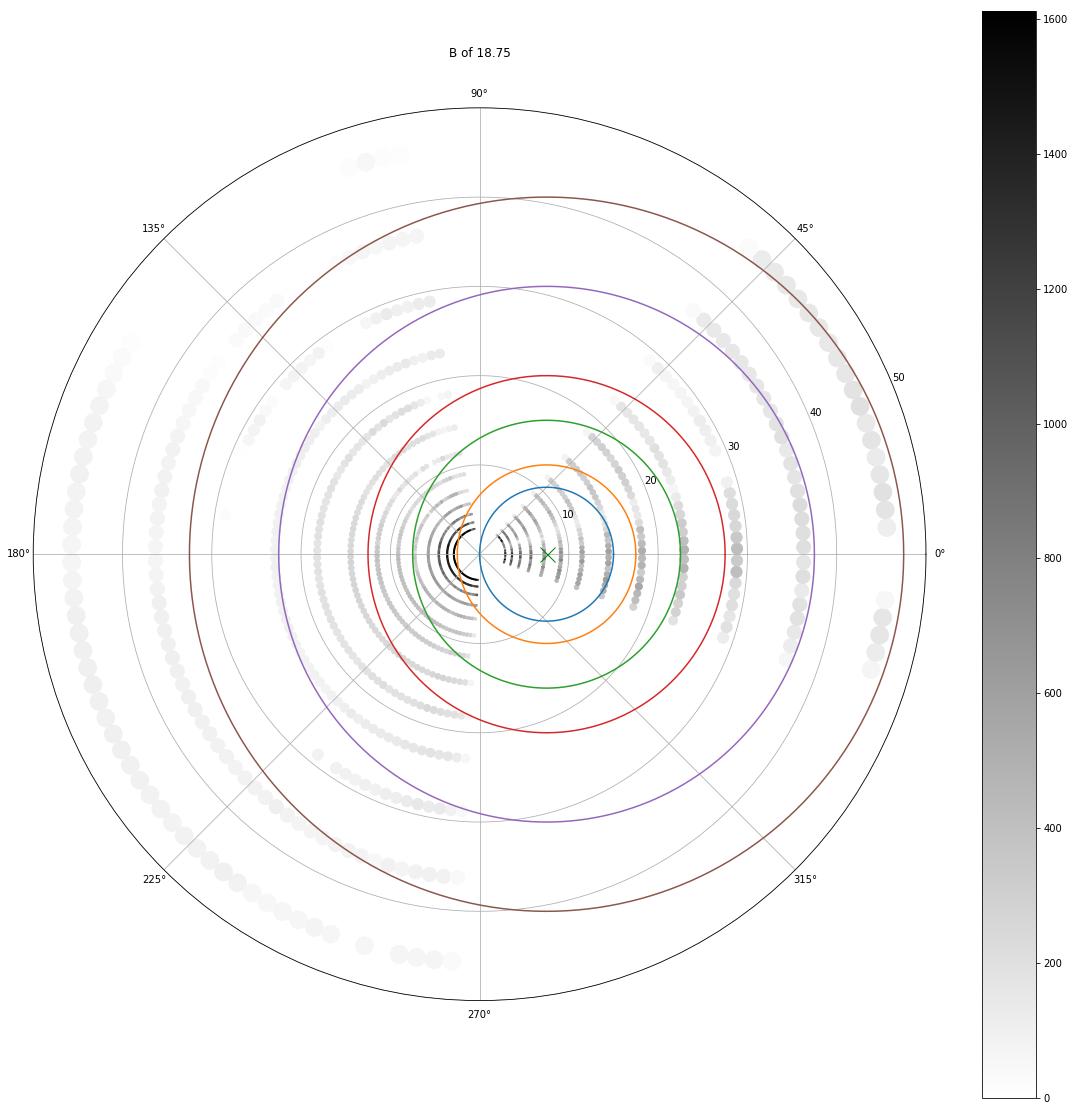

In [15]:
pltDataDist(1) #NORTH!
plt.show()

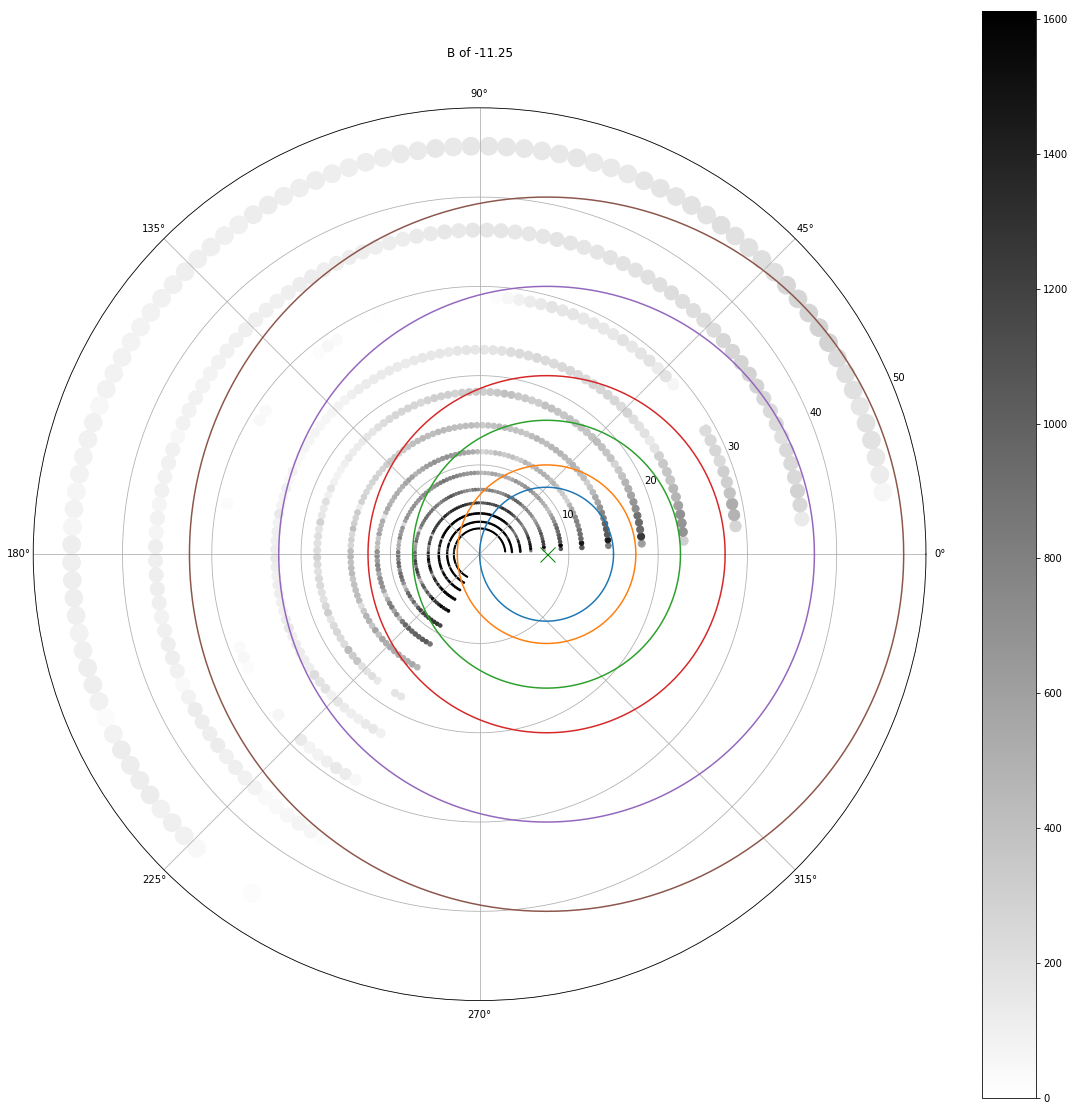

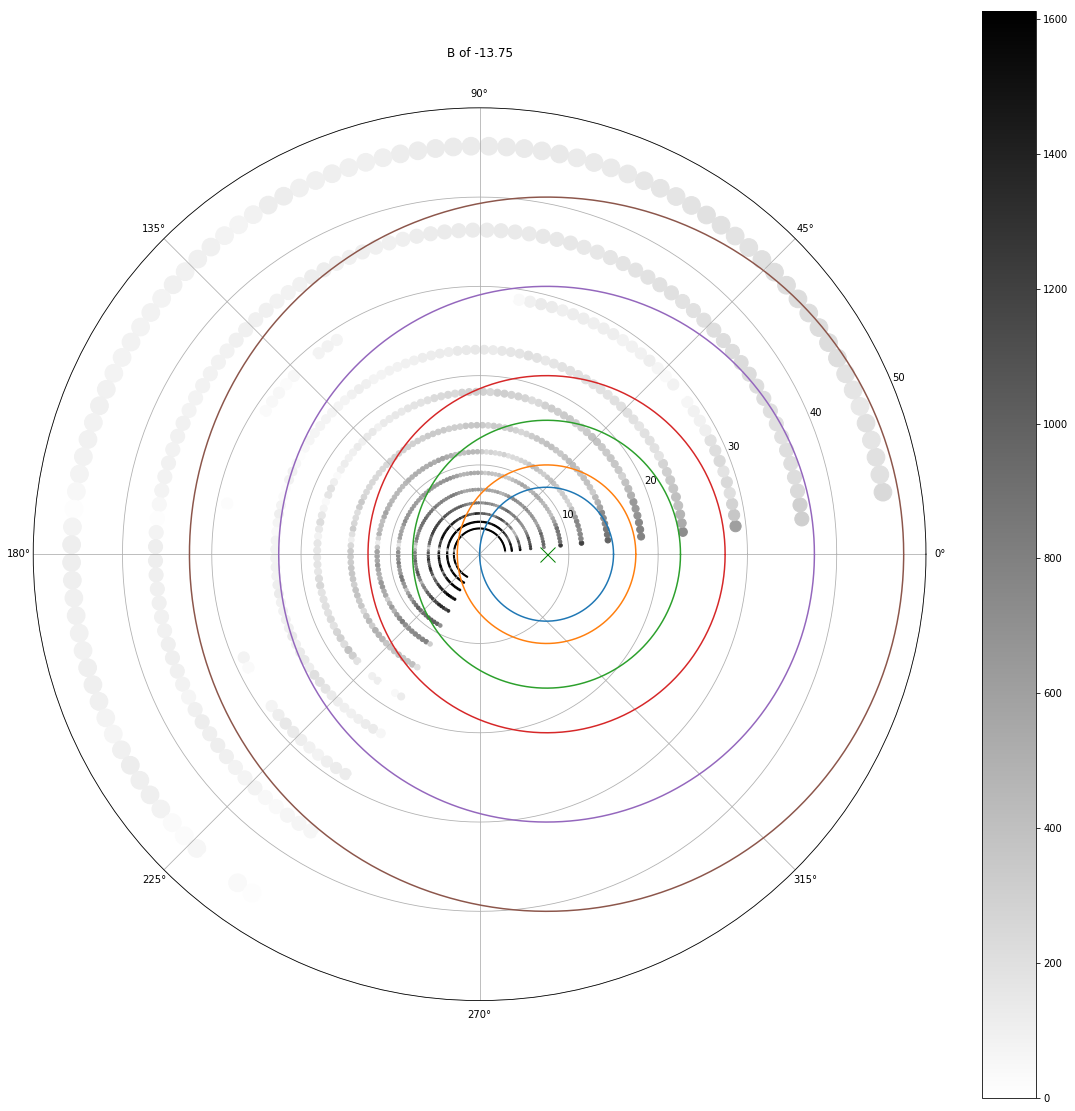

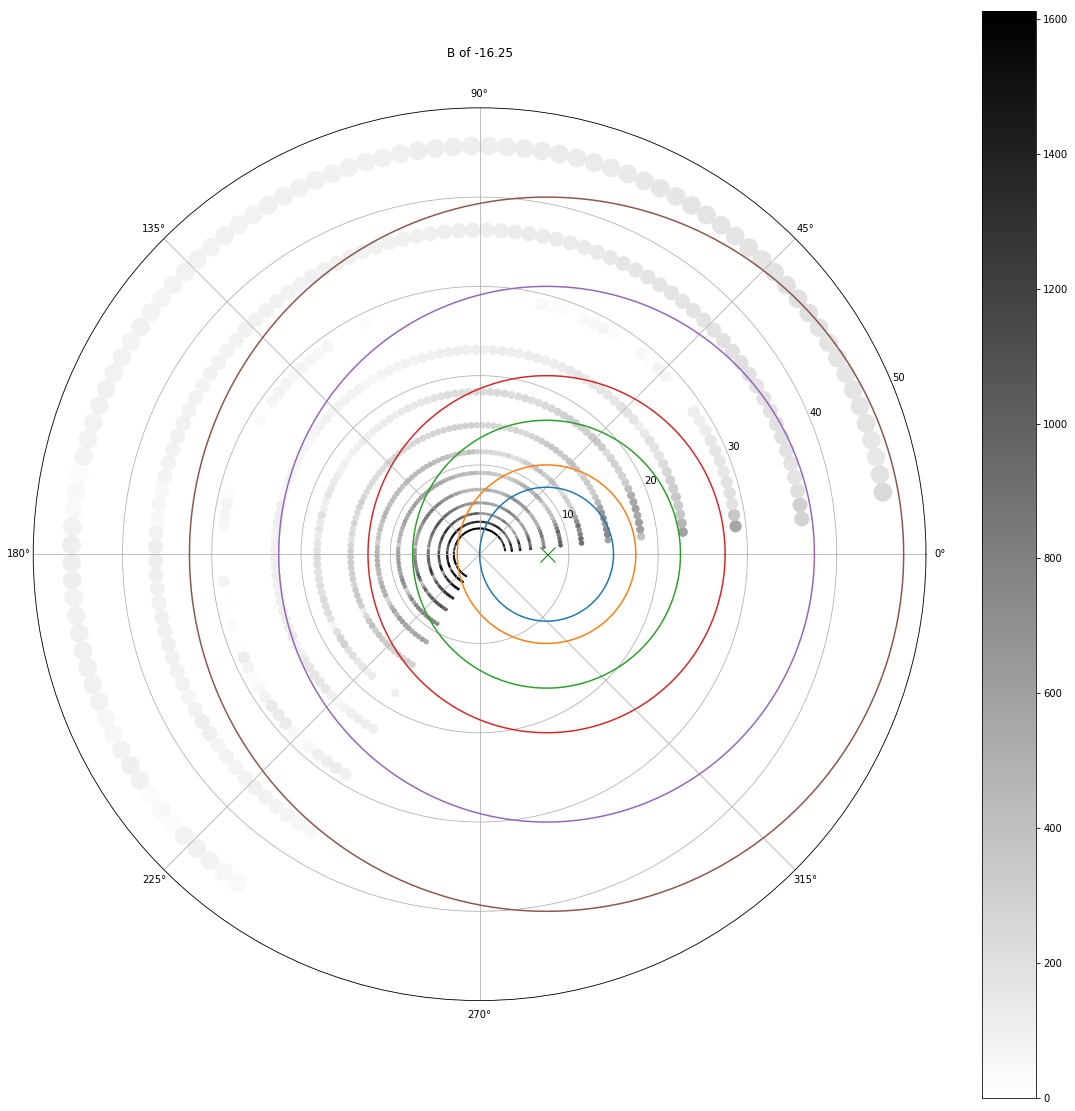

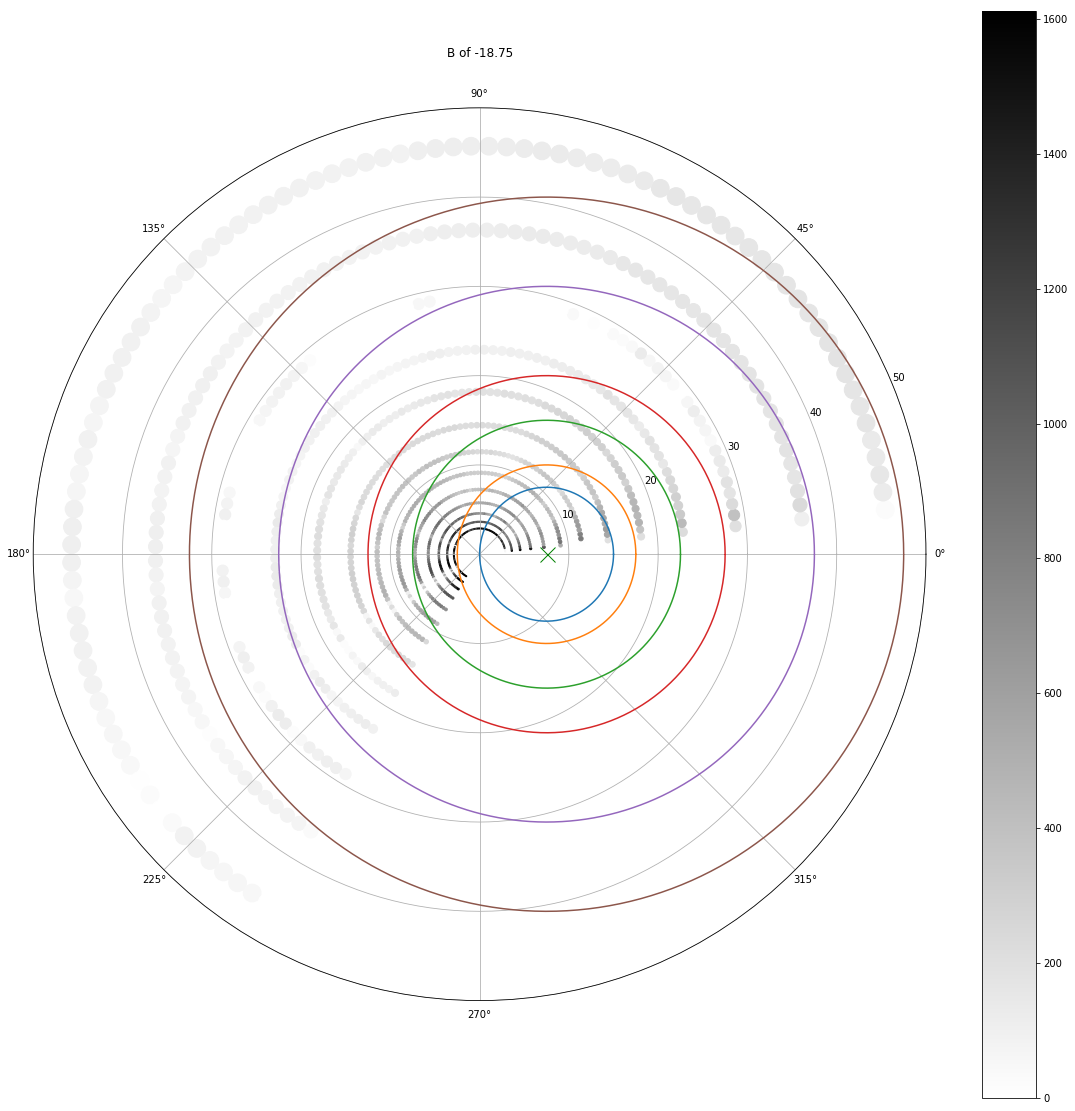

In [16]:
pltDataDist(-1) #SOUTH!
plt.show()

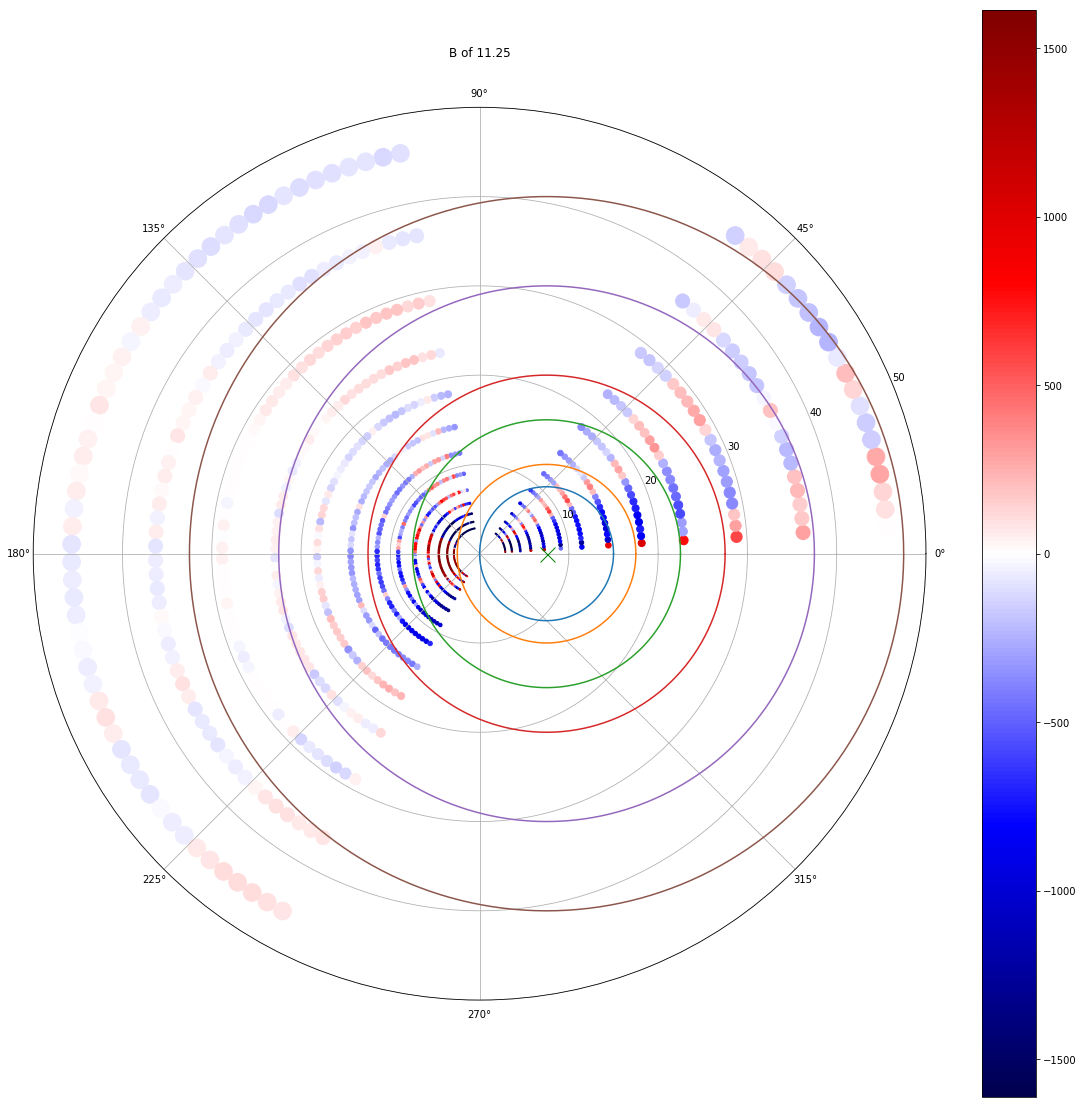

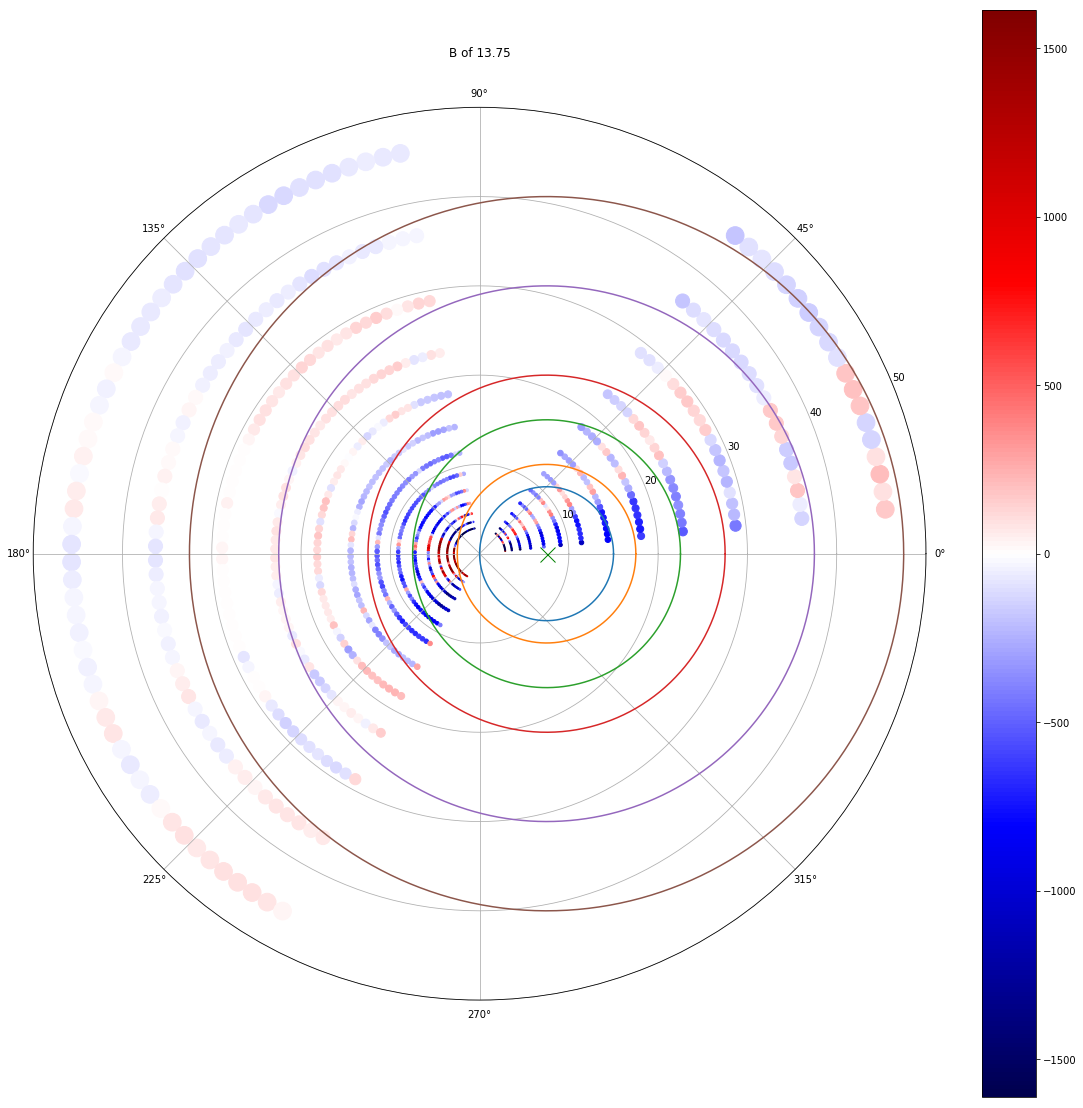

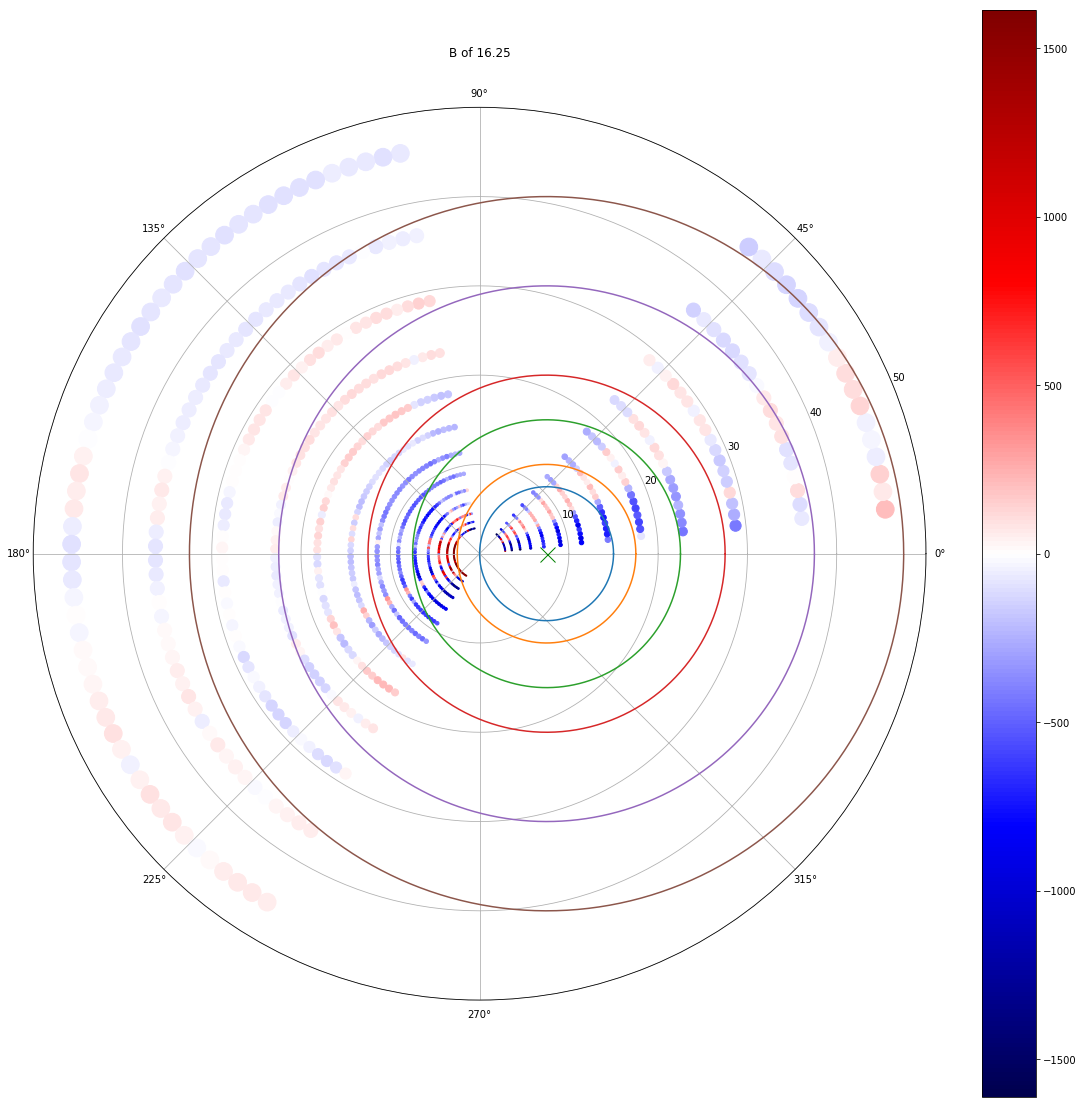

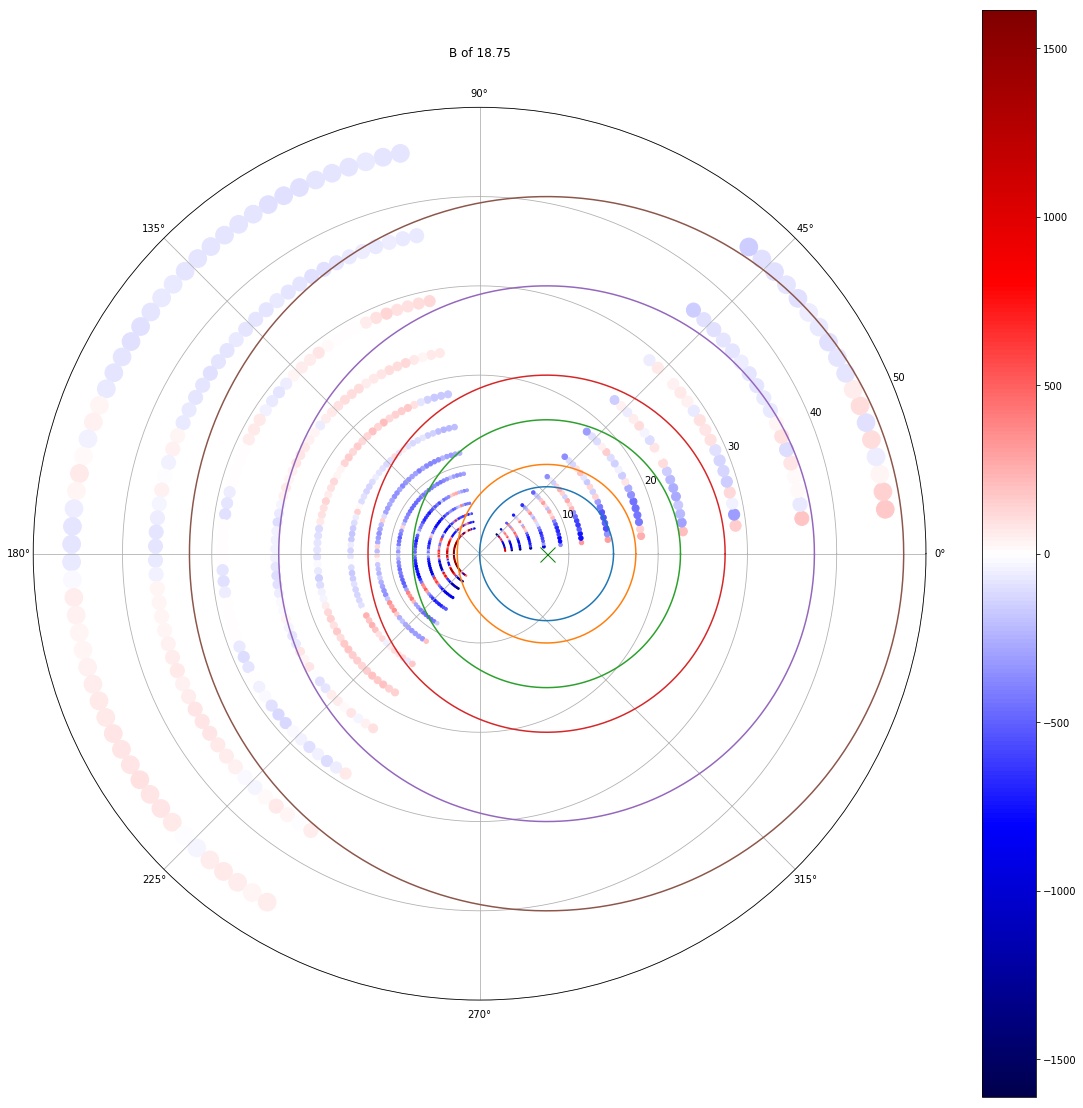

In [17]:
pltDataDist(0) #DIFFERENCE!
plt.show()